# Final Project Zenius MSIB Kel 15

Member: 
1. Ade Amalia
2. Ratu Sondang Elishabet Sidauruk
3. Reynaldi Mulyawan

**Project Background**: 

Many people struggle to get loans due to insufficient or non-existent credit histories. Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience. Home Credit makes use of a variety of alternative data to predict their clients' repayment abilities. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

**Objective**:

1. Identify characteristics of potential clients who will have difficulty repaying loans.
2. Predict client’s repayment abilities.

**Actions**:

1. Perform data cleaning, and EDA.
2. Build a models with machine learning algorithms.
3. Predict client's repayment abilities on application data test with best machine learning model.
4. Provide recommendations for company to increase their clients succeed in applying for loans.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest #feature selection
from sklearn.feature_selection import chi2
from sklearn.utils import resample #re-sampling
from sklearn.model_selection import train_test_split #data splitting
from sklearn.preprocessing import StandardScaler #normalize features

from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #decision tree
from sklearn.ensemble import RandomForestClassifier #random forest
from sklearn.neighbors import KNeighborsClassifier #k-nearest neighbor
from sklearn.neural_network import MLPClassifier #neural network
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import roc_auc_score #roc score
from sklearn.metrics import roc_curve,auc

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', None)

## Load Dataset

In [2]:
df_train = pd.read_csv('application_train.csv')
df_test = pd.read_csv('application_test.csv')

In [175]:
df_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Marr

In [3]:
df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## Data Preparation (Data Cleaning)

### Check for Duplicates

In [4]:
df_train.duplicated().sum()

0

### Handling data for some column

#### Replace XNA with NaN

In [5]:
df_train.loc[df_train['ORGANIZATION_TYPE'] == 'XNA']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,-20099,365243,-7427.0,-3514,NaN,1,0,0,1,0,0,NaN,2.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,XNA,0.587334,0.205747,0.751724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,135000.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.015221,-20417,365243,-5246.0,-2512,NaN,1,0,0,1,1,0,NaN,2.0,2,2,FRIDAY,7,0,0,0,0,0,0,XNA,0.722044,0.555183,0.652897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2396.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006296,-24827,365243,-9012.0,-3684,NaN,1,0,0,1,1,0,NaN,2.0,3,3,FRIDAY,12,0,0,0,0,0,0,XNA,NaN,0.624305,0.669057,0.1443,0.0848,0.9876,0.8300,0.1064,0.14,0.1207,0.3750,0.4167,0.2371,0.1173,0.1484,0.0019,0.0007,0.1261,0.0754,0.9876,0.8367,0.0000,0.1208,0.1034,0.3750,0.4167,0.2425,0.1102,0.0923,0.0000,0.0000,0.1457,0.0848,0.9876,0.8323,0.1071,0.14,0.1207,0.3750,0.4167,0.2412,0.1193,0.1510,0.0019,0.0007,org spec account,block of flats,0.1640,Mixed,No,0.0,0.0,0.0,0.0,-795.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
38,100045,0,Cash loans,F,N,Y,0,99000.000,2

In [6]:
df_train['ORGANIZATION_TYPE'] = df_train['ORGANIZATION_TYPE'].replace(['XNA'], np.nan)

#### Change Days to Years

In [7]:
df_train['DAYS_BIRTH'] = df_train['DAYS_BIRTH'].values/-365
df_train['DAYS_EMPLOYED'] = df_train['DAYS_EMPLOYED'].values/-365
df_train['DAYS_REGISTRATION'] = df_train['DAYS_REGISTRATION'].values/-365
df_train['DAYS_ID_PUBLISH'] = df_train['DAYS_ID_PUBLISH'].values/-365
df_train['DAYS_LAST_PHONE_CHANGE'] = df_train['DAYS_LAST_PHONE_CHANGE'].values/-365

In [8]:
df_train.rename(columns={'DAYS_BIRTH':'AGE','DAYS_EMPLOYED':'YEARS_EMPLOYED','DAYS_EMPLOYED':'YEARS_EMPLOYED','DAYS_REGISTRATION':'YEARS_REGISTRATION','DAYS_ID_PUBLISH':'YEARS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE':'YEARS_LAST_PHONE_CHANGE'}, inplace=True)

### Check for Missing Values

In [9]:
miss_value = pd.DataFrame(df_train.isnull().sum(), columns=['Total Null Values'])
miss_value['Percentage'] = (miss_value['Total Null Values']/df_train.shape[0])*100
miss_value.sort_values(by=['Percentage'], ascending=False).reset_index()

,index,Total Null Values,Percentage
0,COMMONAREA_AVG,214865,69.872297
1,COMMONAREA_MODE,214865,69.872297
2,COMMONAREA_MEDI,214865,69.872297
3,NONLIVINGAPARTMENTS_AVG,213514,69.432963
4,NONLIVINGAPARTMENTS_MODE,213514,69.432963
5,NONLIVINGAPARTMENTS_MEDI,213514,69.432963
6,FONDKAPREMONT_MODE,210295,68.386172
7,LIVINGAPARTMENTS_MEDI,210199,68.354953
8,LIVINGAPARTMENTS_AVG,210199,68.354953
9,LIVINGAPARTMENTS_MODE,210199,68.354953


#### Handle Missing Values (Drop Column with NA value ~ 50 %)

In [10]:
#For dropping some column, we need to figure out which column
miss_value.reset_index()

,index,Total Null Values,Percentage
0,SK_ID_CURR,0,0.000000
1,TARGET,0,0.000000
2,NAME_CONTRACT_TYPE,0,0.000000
3,CODE_GENDER,0,0.000000
4,FLAG_OWN_CAR,0,0.000000
5,FLAG_OWN_REALTY,0,0.000000
6,CNT_CHILDREN,0,0.000000
7,AMT_INCOME_TOTAL,0,0.000000
8,AMT_CREDIT,0,0.000000
9,AMT_ANNUITY,12,0.003902


huge missing value is located at column **44** till **90**, except 'OWN_CAR_AGE' and 'EXT_SOURCE_1'

In [11]:
#For column that contain missing value around 50%, we will drop the columns
df_train.drop(df_train.iloc[:, 44:91], inplace=True, axis=1)
df_train.drop(['OWN_CAR_AGE','EXT_SOURCE_1'], inplace=True, axis=1)

In [12]:
#After drop columns
miss_value = pd.DataFrame(df_train.isnull().sum(), columns=['Total Null Values'])
miss_value['Percentage'] = (miss_value['Total Null Values']/df_train.shape[0])*100
miss_value.sort_values(by=['Percentage'], ascending=False).reset_index()

,index,Total Null Values,Percentage
0,OCCUPATION_TYPE,96391,31.345545
1,EXT_SOURCE_3,60965,19.825307
2,ORGANIZATION_TYPE,55374,18.007161
3,AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.501631
4,AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631
5,AMT_REQ_CREDIT_BUREAU_MON,41519,13.501631
6,AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.501631
7,AMT_REQ_CREDIT_BUREAU_DAY,41519,13.501631
8,AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.501631
9,NAME_TYPE_SUITE,1292,0.420148


In [13]:
#Dataframe after drop columns
df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.920548,1.745205,9.994521,5.808219,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,3.106849,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,2.268493,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.180822,0.616438,11.671233,6.934247,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,2.232877,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.068493,8.326027,26.939726,6.676712,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,1.690411,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54.608219,8.323288,11.810959,9.473973,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,3.030137,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,25.553425,0.646575,23.167123,5.430137,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.681632,NaN,0.0,0.0,0.0,0.0,0.747945,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,5

In [14]:
category_columns = df_train.select_dtypes(include=['object']).columns.tolist()
integer_columns = df_train.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df_train:
    if df_train[column].isnull().any():
        if(column in category_columns):
            df_train[column]=df_train[column].fillna(df_train[column].mode()[0])
        else:
            df_train[column]=df_train[column].fillna(df_train[column].median())

The missing value for categorical data is imputed by using mode\
The missing value for numerical data is imputed by using median due to outliers

In [15]:
#Check missing value after imputing
miss_value = pd.DataFrame(df_train.isnull().sum(), columns=['Total Null Values'])
miss_value['Percentage'] = (miss_value['Total Null Values']/df_train.shape[0])*100
miss_value.sort_values(by=['Percentage'], ascending=False).reset_index()

,index,Total Null Values,Percentage
0,SK_ID_CURR,0,0.0
1,REG_CITY_NOT_WORK_CITY,0,0.0
2,FLAG_DOCUMENT_8,0,0.0
3,FLAG_DOCUMENT_7,0,0.0
4,FLAG_DOCUMENT_6,0,0.0
5,FLAG_DOCUMENT_5,0,0.0
6,FLAG_DOCUMENT_4,0,0.0
7,FLAG_DOCUMENT_3,0,0.0
8,FLAG_DOCUMENT_2,0,0.0
9,YEARS_LAST_PHONE_CHANGE,0,0.0


In [16]:
#Dataframe after imputing with median and mode
df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.920548,1.745205,9.994521,5.808219,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,3.106849,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,2.268493,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.180822,0.616438,11.671233,6.934247,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,2.232877,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.068493,8.326027,26.939726,6.676712,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,1.690411,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54.608219,8.323288,11.810959,9.473973,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,3.030137,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,25.553425,0.646575,23.167123,5.430137,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.681632,0.535276,0.0,0.0,0.0,0.0,0.747945,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / 

### Check for Outliers and Odd Data

An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.\
Outliers can have a disproportionate effect on statistical results, such as the mean, which can result in misleading interpretations

The box plot is a useful graphical display for describing the behavior of the data in the middle as well as at the ends of the distributions. The box plot uses the median and the lower and upper quartiles (defined as the 25th and 75th percentiles). If the lower quartile is Q1 and the upper quartile is Q3, then the difference (Q3 - Q1) is called the interquartile range or IQ. \
We will find the outliers for numerical data only

In [17]:
df_train.select_dtypes(include=['int64','float64']).columns.tolist()

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'AGE',
 'YEARS_EMPLOYED',
 'YEARS_REGISTRATION',
 'YEARS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'YEARS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_1

In [18]:
# Numerical features pt.1
int_features = df_train[["CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]]

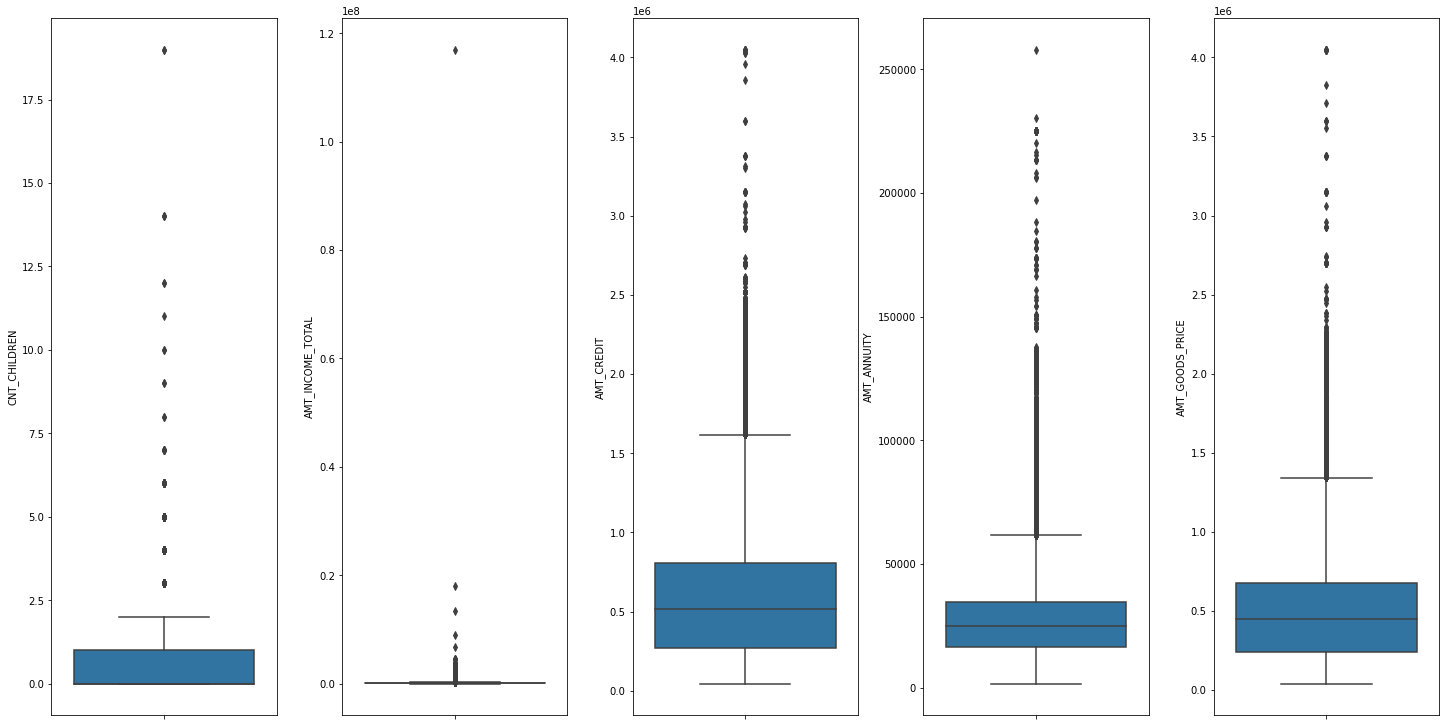

In [19]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i,j in int_features.items():
    sns.boxplot(y = i, data = int_features, ax=axs[index])
    index += 1
    if index == 5:
      break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [20]:
# Numerical features pt.2
int_features2 = df_train[["AGE", "YEARS_EMPLOYED", "YEARS_REGISTRATION", "YEARS_ID_PUBLISH", "CNT_FAM_MEMBERS"]]

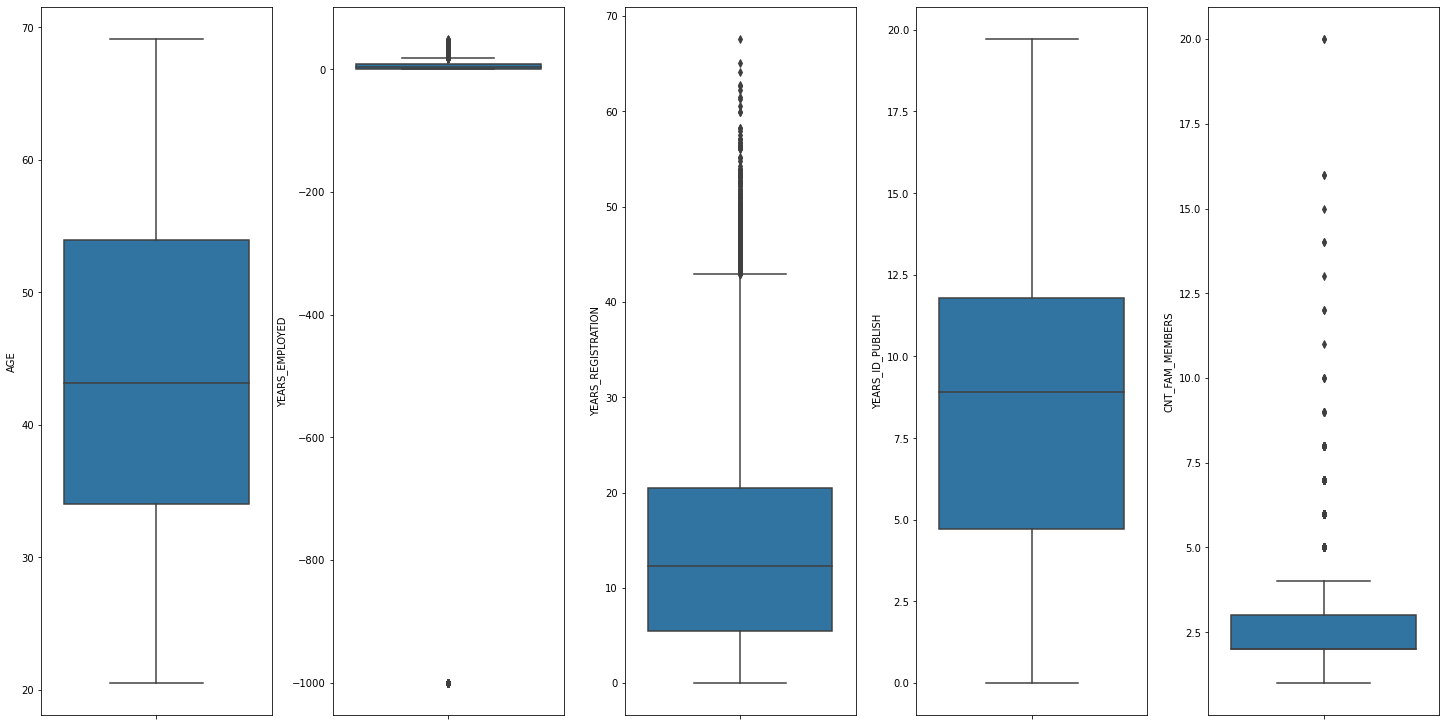

In [21]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i,j in int_features2.items():
    sns.boxplot(y = i, data = int_features2, ax=axs[index])
    index += 1
    if index == 5:
      break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [22]:
# dataset that only consist numerical features pt.3
int_features3 = df_train[["AMT_REQ_CREDIT_BUREAU_YEAR", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_HOUR"]]

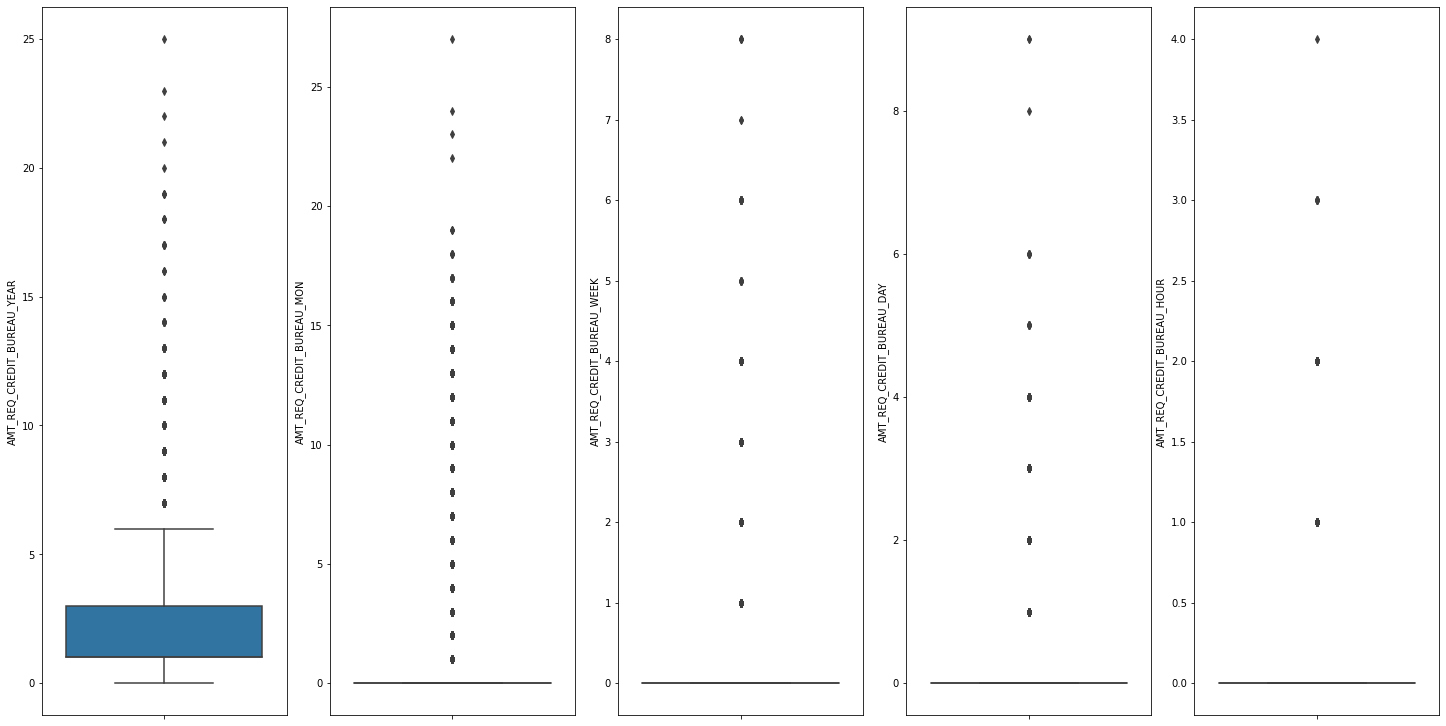

In [23]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i,j in int_features3.items():
    sns.boxplot(y = i, data = int_features3, ax=axs[index])
    index += 1
    if index == 5:
      break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [24]:
# Numerical features pt.4
int_features4 = df_train[["OBS_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", "REGION_POPULATION_RELATIVE"]]

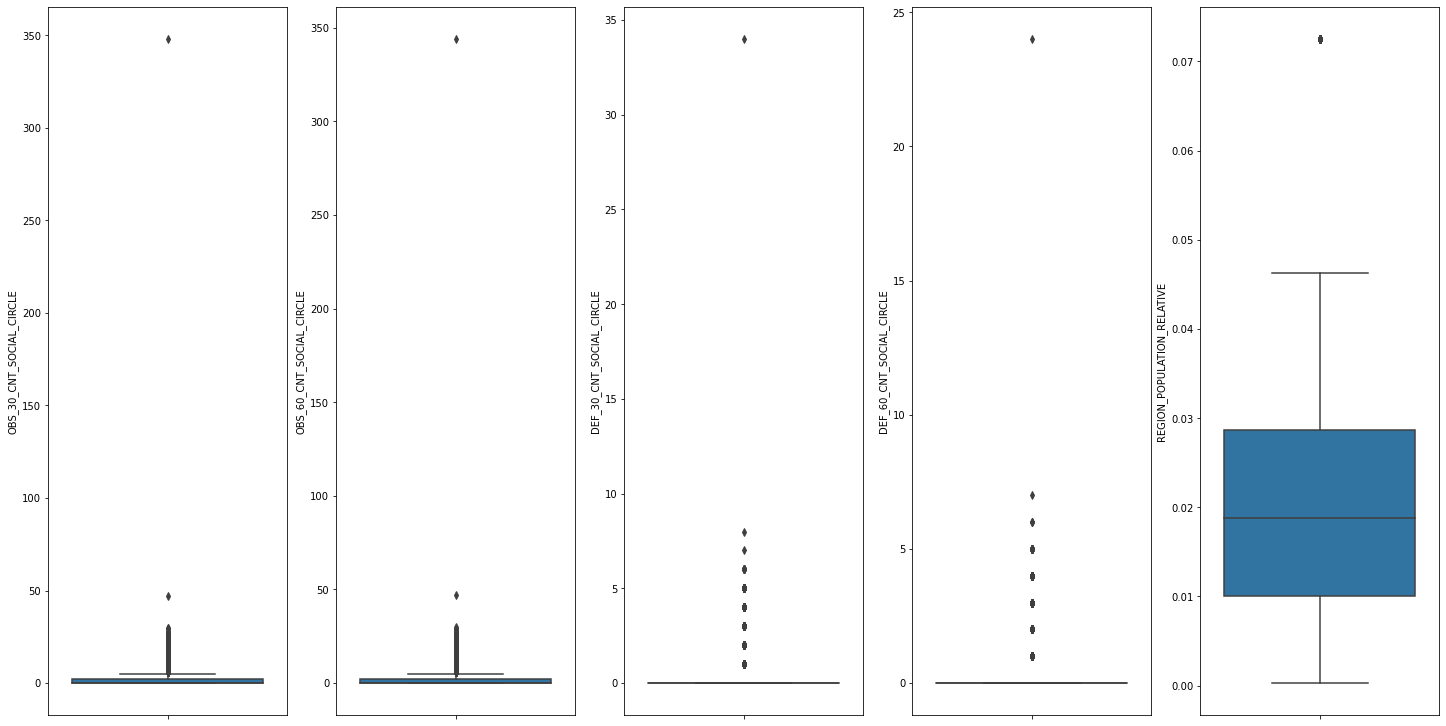

In [25]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i,j in int_features4.items():
    sns.boxplot(y = i, data = int_features4, ax=axs[index])
    index += 1
    if index == 5:
      break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [26]:
#Numerical features pt.5
int_features5 = df_train[["REGION_RATING_CLIENT", "HOUR_APPR_PROCESS_START", "YEARS_LAST_PHONE_CHANGE", "FLAG_DOCUMENT_2", "AMT_REQ_CREDIT_BUREAU_QRT"]]

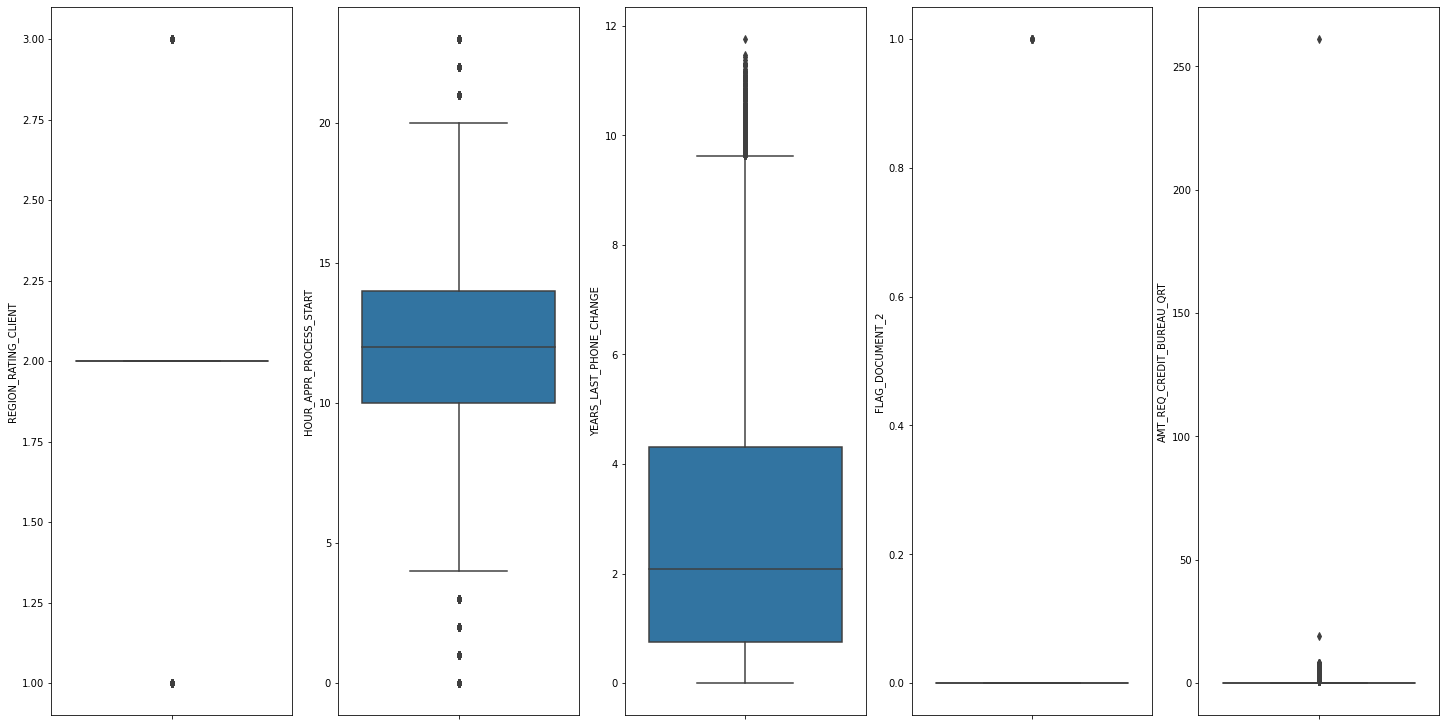

In [27]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i,j in int_features5.items():
    sns.boxplot(y = i, data = int_features5, ax=axs[index])
    index += 1
    if index == 5:
      break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

#### 1. Handling the Outliers (Years Employed)

In [28]:
df_train[df_train['YEARS_EMPLOYED'] < 0]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,55.065753,-1000.665753,20.347945,9.627397,1,0,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,Business Entity Type 3,0.205747,0.751724,1.0,0.0,1.0,0.0,-0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,135000.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.015221,55.936986,-1000.665753,14.372603,6.882192,1,0,0,1,1,0,Laborers,2.0,2,2,FRIDAY,7,0,0,0,0,0,0,Business Entity Type 3,0.555183,0.652897,0.0,0.0,0.0,0.0,6.564384,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006296,68.019178,-1000.665753,24.690411,10.093151,1,0,0,1,1,0,Laborers,2.0,3,3,FRIDAY,12,0,0,0,0,0,0,Business Entity Type 3,0.624305,0.669057,0.0,0.0,0.0,0.0,2.178082,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
38,100045,0,Cash loans,F,N,Y,0,99000.000,247275.0,17338.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006207,65.534247,-1000.665753,26.895890,13.613699,1,0,0,1,1,0,Laborers,2.0,2,2,FRIDAY,11,0,0,0,0,0,0,Business Entity Type 3,0.650765,0.751724,0.0,0.0,0.0,0.0,-0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
43,100050,0,Cash loans,F,N,Y,0,108000.000,746280.0,42970.5,675000.0,Unaccompanied,Pensioner,Higher education,Single / not married,House / apartment,0.010966,64.515068,-1000.665753,15.739726,12.536986,1,0,0,1,0,0,Laborers,1.0,2,2,WEDNESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.766138,0.684828,0.0,0.0,0.0,0.0,1.345205,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307469,456209,0,Cash loans,F,N,Y,0,202500.000,703728.0,29943.0,607500.0,Unaccompanied,Pensioner,Secondary / secondary special,Single / not married,House / apartment,0.031329,61.408219,-1000.665753,32.810959,11.427397,1,0,0,1,0,0,Laborers,1.0,2,2,MONDAY,15,0,0,0,0,0,0,Business Entity Type 3,0.195625,0.360613,11.0,2.0,11.0,0.0,4.567123,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
307483,456227,0,Cash loans,F,N,Y,0,99000.000,247275.0,16479.0,22

In [29]:
df_clean1 = df_train.loc[(df_train['YEARS_EMPLOYED'] > 0)]
df_clean1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.920548,1.745205,9.994521,5.808219,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,3.106849,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,2.268493,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.180822,0.616438,11.671233,6.934247,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,2.232877,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.068493,8.326027,26.939726,6.676712,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,1.690411,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54.608219,8.323288,11.810959,9.473973,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,3.030137,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,456248,0,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,House / apartment,0.022625,45.767123,19.884932,26.843836,0.709589,1,1,0,1,0,0,Sales staff,1.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Self-employed,0.530725,0.535276,0.0,0.0,0.0,0.0,-0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Se

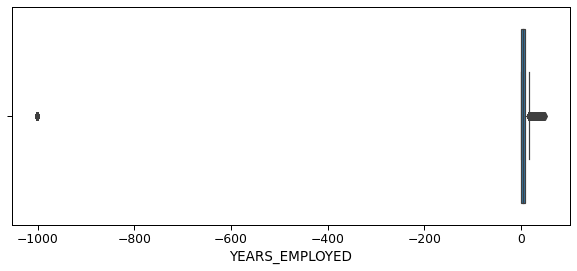

In [177]:
#Check the data using Boxplot
fig = plt.figure(figsize=(10, 4))  
ax = sns.boxplot(data = df_train, x = 'YEARS_EMPLOYED')
plt.show() 

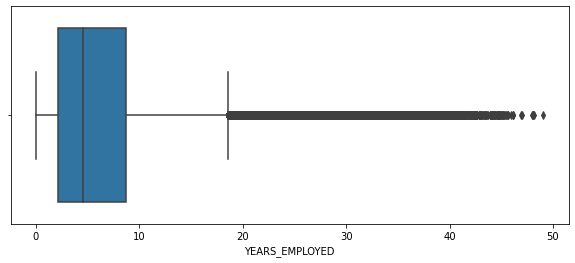

In [30]:
#Check the data using Boxplot
fig = plt.figure(figsize=(10, 4))  
ax = sns.boxplot(data = df_clean1, x = 'YEARS_EMPLOYED')
plt.show() 

If we look at the boxplot below, after dropping some of the outliers, there are still some outliers. Let's check whether there is data on people who work more than their age

In [31]:
df_clean1.loc[(df_clean1["YEARS_EMPLOYED"] > (df_clean1["AGE"]) )]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


#### 2. Handling the Outliers (Amount Income Total)

In [32]:
df_clean1[df_clean1['AMT_INCOME_TOTAL'] > 100000000]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,454500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010643,34.561644,2.526027,18.526027,9.980822,1,1,0,1,0,0,Laborers,3.0,2,2,TUESDAY,14,0,0,0,0,0,0,Business Entity Type 3,0.113161,0.145543,0.0,0.0,0.0,0.0,-0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [33]:
df_clean2 = df_clean1.loc[(df_clean1['AMT_INCOME_TOTAL'] < 100000000)]
df_clean2

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.920548,1.745205,9.994521,5.808219,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,3.106849,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,2.268493,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.180822,0.616438,11.671233,6.934247,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,2.232877,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.068493,8.326027,26.939726,6.676712,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,1.690411,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54.608219,8.323288,11.810959,9.473973,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,3.030137,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,456248,0,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,House / apartment,0.022625,45.767123,19.884932,26.843836,0.709589,1,1,0,1,0,0,Sales staff,1.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Self-employed,0.530725,0.535276,0.0,0.0,0.0,0.0,-0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Se

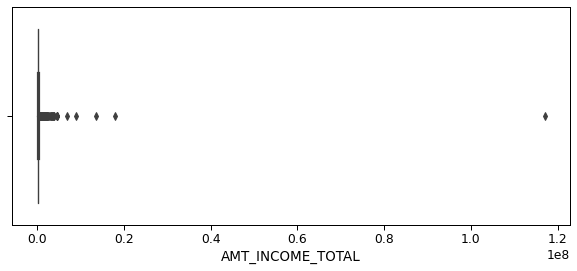

In [180]:
#Check the data using Boxplot
fig = plt.figure(figsize=(10, 4))  
ax = sns.boxplot(data = df_clean1, x = 'AMT_INCOME_TOTAL')
plt.show() 

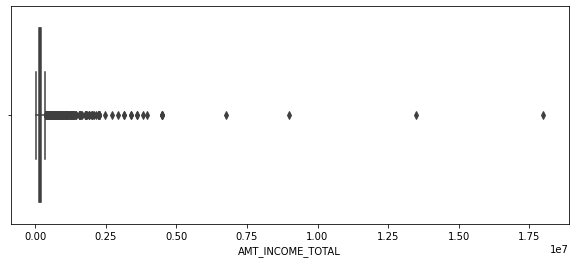

In [34]:
#Check the data using Boxplot
fig = plt.figure(figsize=(10, 4))  
ax = sns.boxplot(data = df_clean2, x = 'AMT_INCOME_TOTAL')
plt.show() 

#### 3. Handling the Odd (Count Children)

In [35]:
df_clean2.loc[(df_clean2['CNT_CHILDREN'] > 10)]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
34545,140032,1,Cash loans,M,Y,N,11,315000.0,1007761.5,38515.5,927000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010643,47.419178,0.542466,10.794521,2.312329,1,1,0,1,0,0,Managers,13.0,2,2,FRIDAY,17,0,0,0,0,1,1,Other,0.567454,0.122955,0.0,0.0,0.0,0.0,0.008219,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
80948,193853,0,Cash loans,F,N,Y,12,337500.0,746280.0,59094.0,675000.0,Family,Commercial associate,Secondary / secondary special,Married,House / apartment,0.046220,38.610959,7.424658,5.660274,10.706849,1,1,0,1,0,0,Core staff,14.0,1,1,FRIDAY,13,0,0,0,0,0,0,Kindergarten,0.703253,0.132597,3.0,2.0,3.0,1.0,0.978082,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
155369,280108,0,Cash loans,F,N,Y,19,112500.0,269550.0,13891.5,225000.0,Family,Working,Secondary / secondary special,Single / not married,House / apartment,0.007020,30.293151,5.076712,8.482192,2.041096,1,1,1,1,1,0,Waiters/barmen staff,20.0,2,2,SUNDAY,11,0,0,0,0,0,0,Restaurant,0.553968,0.535276,1.0,1.0,1.0,1.0,2.038356,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
171125,298322,0,Revolving loans,F,N,Y,12,225000.0,202500.0,10125.0,202500.0,Family,Commercial associate,Secondary / secondary special,Married,House / apartment,0.046220,38.065753,6.964384,5.115068,10.161644,1,1,1,1,1,0,Core staff,14.0,1,1,TUESDAY,13,0,0,0,0,0,0,Kindergarten,0.732542,0.355639,3.0,2.0,3.0,1.0,0.432877,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
176011,303956,0,Cash loans,M,Y,Y,14,225000.0,1085058.0,55530.0,891000.0,Children,Working,Secondary / secondary special,Separated,House / apartment,0.031329,48.641096,4.627397,19.586301,3.556164,1,1,0,1,0,0,Drivers,15.0,2,2,FRIDAY,8,0,0,0,0,0,0,Self-employed,0.513617,0.259468,0.0,0.0,0.0,0.0,4.706849,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
265784,407877,0,Cash loans,F,N,Y,19,112500.0,135000.0,8788.5,135000.0,Unaccompanied,Working,Higher education,Single / not married,House / apartment,0.015221,28.210959,2.454795,12.967123,7.120548,1,1,0,1,1,0,Core staff,20.0,2,2,THURSDAY,15,0,0,0,0,0,0,Kindergarten,0.167332,0.574447,1.0,0.0,1.0,0.0,6.835616,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
267998,410527,0,Cash loans,F,N,N,14,54000.0,604152.0,25596.0,540000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.011703,42.364384,1.479452,17.046575,11.827397,1,1,1,1,1,0,Managers,16.0,2,2,SUNDAY,14,0,0,0,0,0,0,Postal,0.712226,0.567379,0.0,0.0,0.0,0.0,0.841096,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [36]:
df_clean3 = df_clean2.loc[(df_clean2['CNT_CHILDREN'] < 10)]
df_clean3

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.920548,1.745205,9.994521,5.808219,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,3.106849,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,2.268493,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.180822,0.616438,11.671233,6.934247,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,2.232877,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.068493,8.326027,26.939726,6.676712,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,1.690411,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54.608219,8.323288,11.810959,9.473973,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,3.030137,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,456248,0,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,House / apartment,0.022625,45.767123,19.884932,26.843836,0.709589,1,1,0,1,0,0,Sales staff,1.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Self-employed,0.530725,0.535276,0.0,0.0,0.0,0.0,-0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Se

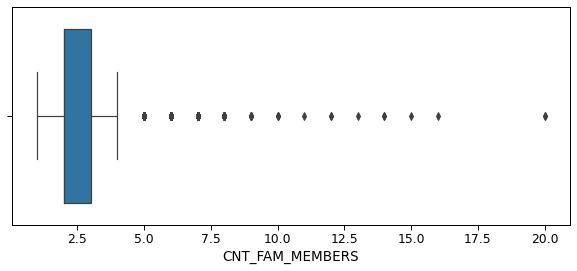

In [181]:
#Check the data using Boxplot
fig = plt.figure(figsize=(10, 4))  
ax = sns.boxplot(data = df_clean2, x = 'CNT_FAM_MEMBERS')
plt.show() 

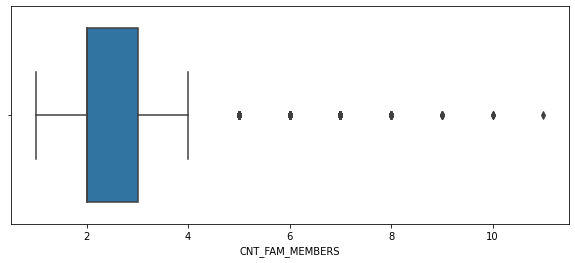

In [37]:
#Check the data using Boxplot
fig = plt.figure(figsize=(10, 4))  
ax = sns.boxplot(data = df_clean3, x = 'CNT_FAM_MEMBERS')
plt.show() 

#### 4. Handling the Outliers (Years Registration)

In [38]:
df_clean3.loc[(df_clean3['YEARS_REGISTRATION'] > 40)]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
112,100132,0,Cash loans,F,N,Y,0,202500.0,1136439.0,73611.0,1089000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Widow,House / apartment,0.032561,64.810959,2.652055,40.180822,12.208219,1,1,0,1,1,0,Cleaning staff,1.0,1,1,TUESDAY,14,0,0,0,0,0,0,Business Entity Type 2,0.711289,0.597192,0.0,0.0,0.0,0.0,2.479452,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1202,101417,0,Cash loans,F,N,Y,2,103500.0,286704.0,20520.0,247500.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010966,46.783562,3.079452,46.610959,1.726027,1,1,0,1,0,0,Cooking staff,3.0,2,2,FRIDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.449047,0.574447,1.0,0.0,1.0,0.0,4.493151,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
1976,102318,0,Cash loans,M,Y,Y,0,112500.0,158301.0,15552.0,148500.0,Family,State servant,Secondary / secondary special,Married,House / apartment,0.046220,67.657534,6.553425,40.682192,11.175342,1,1,0,1,0,0,Security staff,2.0,1,1,THURSDAY,12,0,0,0,0,0,0,School,0.305763,0.535276,0.0,0.0,0.0,0.0,1.142466,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2680,103127,0,Cash loans,F,N,N,0,135000.0,479700.0,49284.0,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.002042,57.482192,31.926027,57.482192,12.339726,1,1,1,1,0,0,Core staff,2.0,3,3,SATURDAY,13,0,0,0,0,0,0,School,0.645238,0.495666,0.0,0.0,0.0,0.0,3.076712,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
2840,103314,0,Cash loans,F,N,N,0,247500.0,239850.0,23719.5,225000.0,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,0.032561,50.616438,1.339726,49.202740,3.169863,1,1,1,1,1,0,Medicine staff,2.0,1,1,SUNDAY,13,0,0,0,0,0,0,Medicine,0.688811,0.535276,0.0,0.0,0.0,0.0,1.901370,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303917,452119,0,Cash loans,F,N,Y,0,202500.0,719860.5,48429.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.010032,45.591781,10.353425,41.386301,0.471233,1,1,0,1,0,0,Sales staff,2.0,2,2,MONDAY,2,0,0,0,0,0,0,Trade: type 7,0.688633,0.572683,0.0,0.0,0.0,0.0,6.065753,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,7.0
303945,452155,0,Cash loans,F,N,Y,0,81000.0,100512.0,4963.5,72000.0,Unaccompanied,Working,

In [39]:
df_clean4 = df_clean3.loc[(df_clean3['YEARS_REGISTRATION'] < 40)]
df_clean4

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.920548,1.745205,9.994521,5.808219,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,3.106849,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,2.268493,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.180822,0.616438,11.671233,6.934247,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,2.232877,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.068493,8.326027,26.939726,6.676712,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,1.690411,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54.608219,8.323288,11.810959,9.473973,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,3.030137,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,456248,0,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,House / apartment,0.022625,45.767123,19.884932,26.843836,0.709589,1,1,0,1,0,0,Sales staff,1.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Self-employed,0.530725,0.535276,0.0,0.0,0.0,0.0,-0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Se

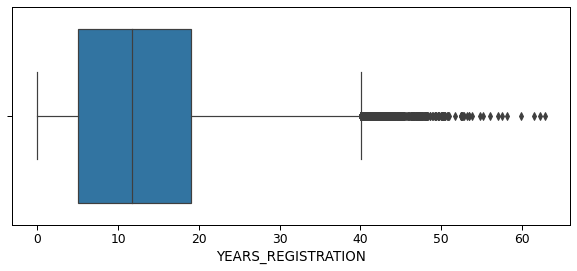

In [182]:
#Check the data using Boxplot
fig = plt.figure(figsize=(10, 4))  
ax = sns.boxplot(data = df_clean3, x = 'YEARS_REGISTRATION')
plt.show() 

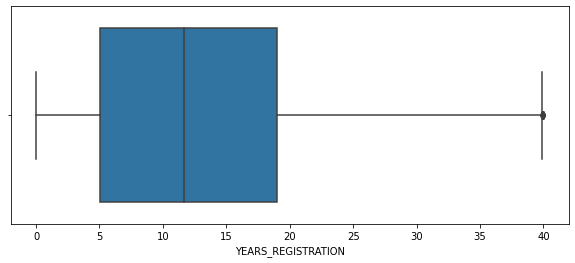

In [40]:
#Check the data using Boxplot
fig = plt.figure(figsize=(10, 4))  
ax = sns.boxplot(data = df_clean4, x = 'YEARS_REGISTRATION')
plt.show() 

#### 5. Handling the Outliers (Social Circle)

In [41]:
df_clean4.loc[(df_clean4['OBS_30_CNT_SOCIAL_CIRCLE'] > 40)]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
77497,189856,0,Cash loans,M,Y,Y,1,157500.0,296280.0,23539.5,225000.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.010147,40.457534,7.580822,36.454795,12.931507,1,1,0,1,0,1,Laborers,3.0,2,2,MONDAY,17,0,0,0,0,0,0,Industry: type 4,0.398805,0.750375,47.0,0.0,47.0,0.0,-0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
148403,272071,0,Revolving loans,M,N,Y,0,202500.0,180000.0,9000.0,180000.0,Family,State servant,Higher education,Single / not married,House / apartment,0.020246,27.701370,5.252055,6.317808,6.317808,1,1,0,1,0,0,Core staff,1.0,3,3,THURSDAY,9,0,0,0,0,1,1,Police,0.304506,0.357293,348.0,34.0,344.0,24.0,1.827397,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,1.0,0.0,3.0


In [42]:
df_clean5 = df_clean4.loc[(df_clean4['OBS_30_CNT_SOCIAL_CIRCLE'] < 40)]
df_clean5

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.920548,1.745205,9.994521,5.808219,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,3.106849,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,2.268493,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.180822,0.616438,11.671233,6.934247,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,2.232877,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.068493,8.326027,26.939726,6.676712,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,1.690411,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54.608219,8.323288,11.810959,9.473973,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,3.030137,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,456248,0,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,House / apartment,0.022625,45.767123,19.884932,26.843836,0.709589,1,1,0,1,0,0,Sales staff,1.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Self-employed,0.530725,0.535276,0.0,0.0,0.0,0.0,-0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Se

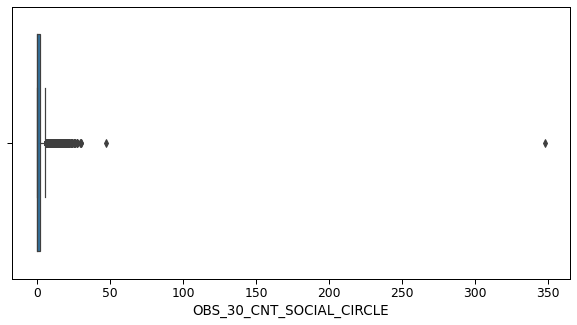

In [183]:
#Check the data using Boxplot
fig = plt.figure(figsize=(10, 5))  
ax = sns.boxplot(data = df_clean4, x = 'OBS_30_CNT_SOCIAL_CIRCLE')
plt.show() 

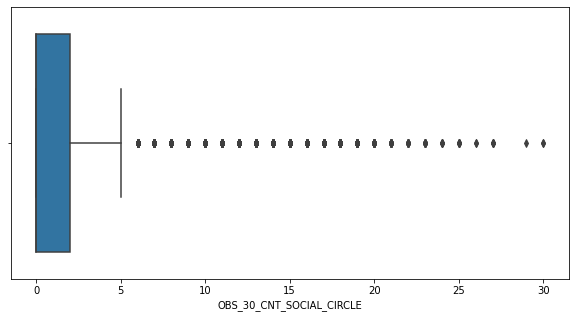

In [43]:
#Check the data using Boxplot
fig = plt.figure(figsize=(10, 5))  
ax = sns.boxplot(data = df_clean5, x = 'OBS_30_CNT_SOCIAL_CIRCLE')
plt.show() 

## Data Preparation (EDA)

In [44]:
df_train_cln = df_clean5

In [45]:
#Check data types
df_train_cln.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251513 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   251513 non-null  int64  
 1   TARGET                       251513 non-null  int64  
 2   NAME_CONTRACT_TYPE           251513 non-null  object 
 3   CODE_GENDER                  251513 non-null  object 
 4   FLAG_OWN_CAR                 251513 non-null  object 
 5   FLAG_OWN_REALTY              251513 non-null  object 
 6   CNT_CHILDREN                 251513 non-null  int64  
 7   AMT_INCOME_TOTAL             251513 non-null  float64
 8   AMT_CREDIT                   251513 non-null  float64
 9   AMT_ANNUITY                  251513 non-null  float64
 10  AMT_GOODS_PRICE              251513 non-null  float64
 11  NAME_TYPE_SUITE              251513 non-null  object 
 12  NAME_INCOME_TYPE             251513 non-null  object 
 13 

### Bivariate Analysis (Categorical Data)

Bivariate analysis is one of the simplest forms of quantitative analysis. It involves the analysis of two variables, for the purpose of determining the empirical relationship between them.

In [46]:
df_train_cln.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.920548,1.745205,9.994521,5.808219,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,3.106849,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,2.268493,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.180822,0.616438,11.671233,6.934247,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,2.232877,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.068493,8.326027,26.939726,6.676712,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,1.690411,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54.608219,8.323288,11.810959,9.473973,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,3.030137,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
df_train_cln.select_dtypes(include=['object']).columns.tolist()

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [48]:
# Change Output Name
df_train_cln['CODE_GENDER'] = df_train_cln['CODE_GENDER'].replace(['F','M'],['Female','Male'])

#### Gender vs Target

In [49]:
gvt = pd.crosstab(df_train_cln['CODE_GENDER'], df_train_cln['TARGET'])
pgvt = df_train_cln[['CODE_GENDER','TARGET']].groupby(['CODE_GENDER']).mean().sort_values(by=['TARGET'], ascending=False)
display(gvt,pgvt)

TARGET,0,1
CODE_GENDER,,
Female,144782,11901
Male,84919,9907
XNA,4,0


,TARGET
CODE_GENDER,
Male,0.104476
Female,0.075956
XNA,0.000000


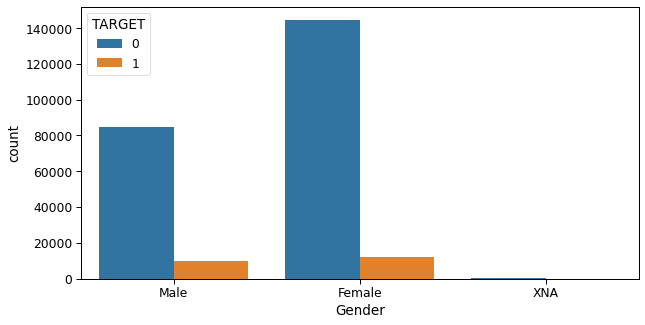

In [166]:
fig = plt.figure(figsize=(10,5))  
ax = sns.countplot(data = df_train_cln, x='CODE_GENDER', hue = 'TARGET')
ax.set_xlabel('Gender')

plt.xticks(rotation = 0)
plt.show()

In [ ]:
fig = plt.figure(figsize=(10,5))  
ax = sns.countplot(data = df_train_cln, x='CODE_GENDER', hue = 'TARGET')
ax.set_xlabel('Gender')

plt.xticks(rotation = 25)
plt.show()

It can be seen that women apply for more loans than men. In total, there were around 202,448 loan applications submitted by women, and around 105,059 applications were submitted by men.\
However, men have larger problems repaying loans for its percentage than female.

#### Car Ownership vs Target

In [50]:
covt = pd.crosstab(df_train_cln['FLAG_OWN_CAR'], df_train_cln['TARGET'])
pcovt = df_train_cln[['FLAG_OWN_CAR','TARGET']].groupby(['FLAG_OWN_CAR']).mean().sort_values(by=['TARGET'], ascending=False)
display(covt,pcovt)

TARGET,0,1
FLAG_OWN_CAR,,
N,142510,14734
Y,87195,7074


,TARGET
FLAG_OWN_CAR,
N,0.093702
Y,0.075041


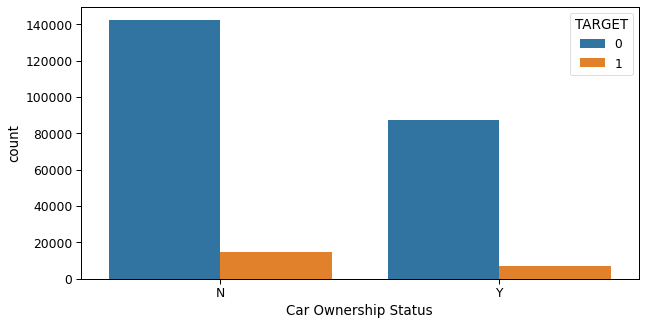

In [165]:
fig = plt.figure(figsize=(10,5))  
ax = sns.countplot(data = df_train_cln, x='FLAG_OWN_CAR', hue = 'TARGET')
ax.set_xlabel('Car Ownership Status')

plt.xticks(rotation = 0)
plt.show()

#### Realty Ownership vs Target

In [51]:
rovt = pd.crosstab(df_train_cln['FLAG_OWN_REALTY'], df_train_cln['TARGET'])
provt = df_train_cln[['FLAG_OWN_REALTY','TARGET']].groupby(['FLAG_OWN_REALTY']).mean().sort_values(by=['TARGET'], ascending=False)
display(rovt,provt)

TARGET,0,1
FLAG_OWN_REALTY,,
N,73810,7100
Y,155895,14708


,TARGET
FLAG_OWN_REALTY,
N,0.087752
Y,0.086212


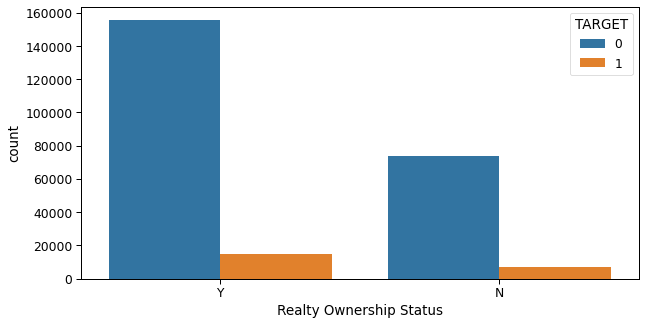

In [167]:
fig = plt.figure(figsize=(10,5))  
ax = sns.countplot(data = df_train_cln, x='FLAG_OWN_REALTY', hue = 'TARGET')
ax.set_xlabel('Realty Ownership Status')

plt.xticks(rotation = 0)
plt.show()

#### Suite Type vs Target

In [52]:
stvt = pd.crosstab(df_train_cln['NAME_TYPE_SUITE'], df_train_cln['TARGET'])
pstvt = df_train_cln[['NAME_TYPE_SUITE','TARGET']].groupby(['NAME_TYPE_SUITE']).mean().sort_values(by=['TARGET'], ascending=False)
display(stvt,pstvt)

TARGET,0,1
NAME_TYPE_SUITE,,
Children,2074,169
Family,29055,2516
Group of people,194,22
Other_A,692,69
Other_B,1313,155
"Spouse, partner",8844,805
Unaccompanied,187533,18072


,TARGET
NAME_TYPE_SUITE,
Other_B,0.105586
Group of people,0.101852
Other_A,0.090670
Unaccompanied,0.087897
"Spouse, partner",0.083428
Family,0.079693
Children,0.075346


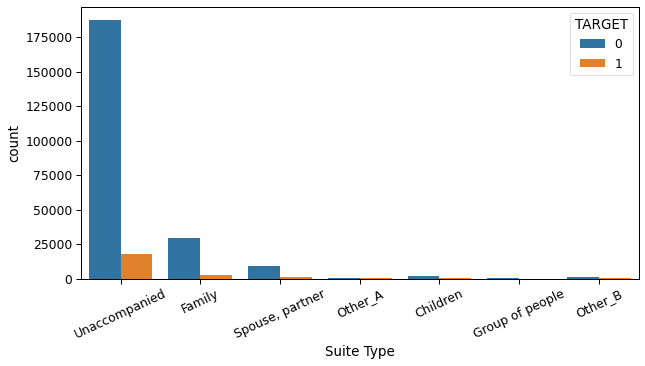

In [168]:
fig = plt.figure(figsize=(10,5))  
ax = sns.countplot(data = df_train_cln, x='NAME_TYPE_SUITE', hue = 'TARGET')
ax.set_xlabel('Suite Type')

plt.xticks(rotation = 25)
plt.show()

#### Education Type vs Target

In [53]:
etvt = pd.crosstab(df_train_cln['NAME_EDUCATION_TYPE'], df_train_cln['TARGET'])
petvt = df_train_cln[['NAME_EDUCATION_TYPE','TARGET']].groupby(['NAME_EDUCATION_TYPE']).mean().sort_values(by=['TARGET'], ascending=False)
display(etvt,petvt)

TARGET,0,1
NAME_EDUCATION_TYPE,,
Academic degree,135,3
Higher education,62854,3666
Incomplete higher,8902,848
Lower secondary,1964,313
Secondary / secondary special,155850,16978


,TARGET
NAME_EDUCATION_TYPE,
Lower secondary,0.137462
Secondary / secondary special,0.098236
Incomplete higher,0.086974
Higher education,0.055111
Academic degree,0.021739


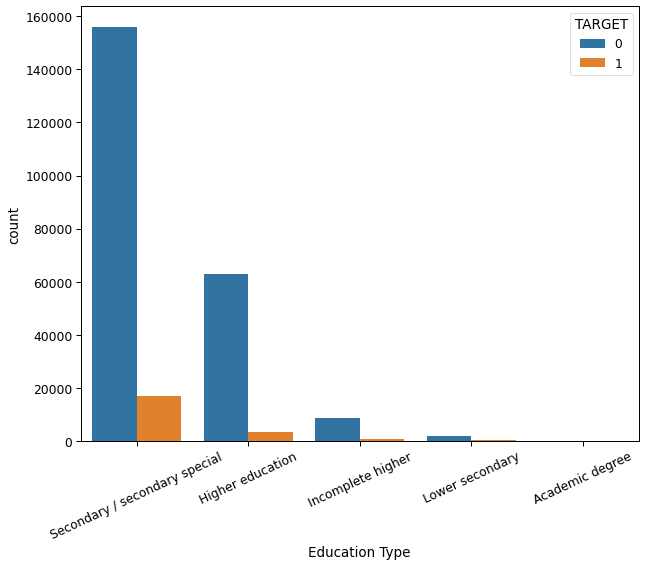

In [176]:
fig = plt.figure(figsize=(10,8))  
ax = sns.countplot(data = df_train_cln, x='NAME_EDUCATION_TYPE', hue = 'TARGET')
ax.set_xlabel('Education Type')

plt.xticks(rotation = 25)
plt.show()

#### Family Status vs Target

In [54]:
fsvt = pd.crosstab(df_train_cln['NAME_FAMILY_STATUS'], df_train_cln['TARGET'])
pfsvt = df_train_cln[['NAME_FAMILY_STATUS','TARGET']].groupby(['NAME_FAMILY_STATUS']).mean().sort_values(by=['TARGET'], ascending=False)
display(fsvt,pfsvt)

TARGET,0,1
NAME_FAMILY_STATUS,,
Civil marriage,23409,2724
Married,150419,13179
Separated,14544,1392
Single / not married,35099,4114
Unknown,2,0
Widow,6232,399


,TARGET
NAME_FAMILY_STATUS,
Single / not married,0.104914
Civil marriage,0.104236
Separated,0.087349
Married,0.080557
Widow,0.060172
Unknown,0.000000


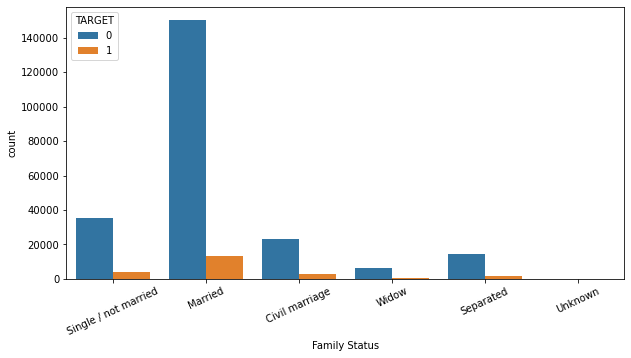

In [55]:
fig = plt.figure(figsize=(10,5))  
ax = sns.countplot(data = df_train_cln, x='NAME_FAMILY_STATUS', hue = 'TARGET')
ax.set_xlabel('Family Status')

plt.xticks(rotation = 25)
plt.show()

#### Housing Type vs Target

In [56]:
htvt = pd.crosstab(df_train_cln['NAME_HOUSING_TYPE'], df_train_cln['TARGET'])
phtvt = df_train_cln[['NAME_HOUSING_TYPE','TARGET']].groupby(['NAME_HOUSING_TYPE']).mean().sort_values(by=['TARGET'], ascending=False)
display(htvt,phtvt)

TARGET,0,1
NAME_HOUSING_TYPE,,
Co-op apartment,919,84
House / apartment,201483,18450
Municipal apartment,8183,809
Office apartment,2143,153
Rented apartment,4086,587
With parents,12891,1725


,TARGET
NAME_HOUSING_TYPE,
Rented apartment,0.125615
With parents,0.118021
Municipal apartment,0.089969
House / apartment,0.083889
Co-op apartment,0.083749
Office apartment,0.066638


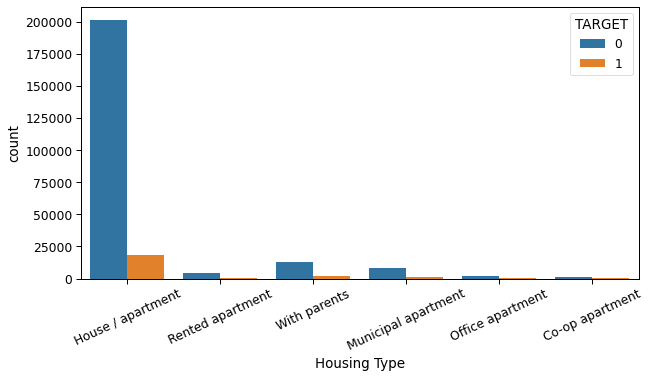

In [170]:
fig = plt.figure(figsize=(10,5))  
ax = sns.countplot(data = df_train_cln, x='NAME_HOUSING_TYPE', hue = 'TARGET')
ax.set_xlabel('Housing Type')

plt.xticks(rotation = 25)
plt.show()

#### Ocupation Type vs Target

In [57]:
otvt = pd.crosstab(df_train_cln['OCCUPATION_TYPE'], df_train_cln['TARGET'])
potvt = df_train_cln[['OCCUPATION_TYPE','TARGET']].groupby(['OCCUPATION_TYPE']).mean().sort_values(by=['TARGET'], ascending=False)
display(otvt,potvt)

TARGET,0,1
OCCUPATION_TYPE,,
Accountants,9304,473
Cleaning staff,4163,446
Cooking staff,5312,621
Core staff,25762,1735
Drivers,16476,2105
HR staff,525,36
High skill tech staff,10649,700
IT staff,491,34
Laborers,86854,9116


,TARGET
OCCUPATION_TYPE,
Low-skill Laborers,0.171620
Drivers,0.113288
Waiters/barmen staff,0.112843
Security staff,0.107793
Cooking staff,0.104669
Cleaning staff,0.096767
Sales staff,0.096355
Laborers,0.094988
Realty agents,0.078667


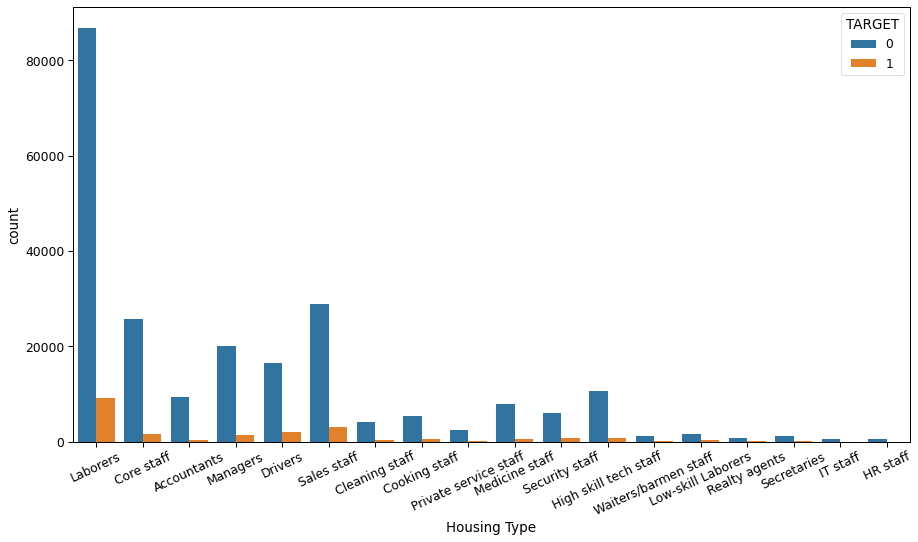

In [173]:
fig = plt.figure(figsize=(15,8))  
ax = sns.countplot(data = df_train_cln, x='OCCUPATION_TYPE', hue = 'TARGET')
ax.set_xlabel('Housing Type')

plt.xticks(rotation = 25)
plt.show()

#### Process Day vs Target

In [58]:
pdvt = pd.crosstab(df_train_cln['WEEKDAY_APPR_PROCESS_START'], df_train_cln['TARGET'])
ppdvt = df_train_cln[['WEEKDAY_APPR_PROCESS_START','TARGET']].groupby(['WEEKDAY_APPR_PROCESS_START']).mean().sort_values(by=['TARGET'], ascending=False)
display(pdvt,ppdvt)

TARGET,0,1
WEEKDAY_APPR_PROCESS_START,,
FRIDAY,37198,3586
MONDAY,38020,3458
SATURDAY,25900,2369
SUNDAY,12660,1155
THURSDAY,37477,3618
TUESDAY,39891,3948
WEDNESDAY,38559,3674


,TARGET
WEEKDAY_APPR_PROCESS_START,
TUESDAY,0.090057
THURSDAY,0.088040
FRIDAY,0.087927
WEDNESDAY,0.086994
SATURDAY,0.083802
SUNDAY,0.083605
MONDAY,0.083369


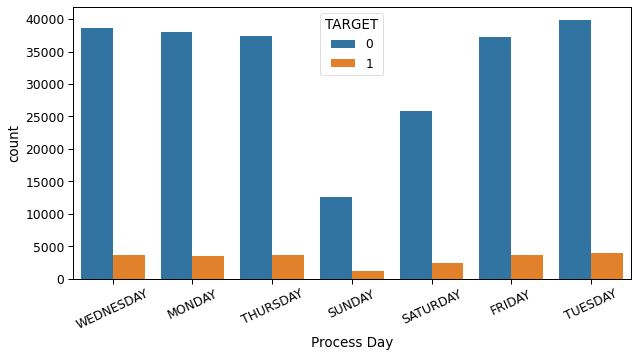

In [174]:
fig = plt.figure(figsize=(10,5))  
ax = sns.countplot(data = df_train_cln, x='WEEKDAY_APPR_PROCESS_START', hue = 'TARGET')
ax.set_xlabel('Process Day')

plt.xticks(rotation = 25)
plt.show()

#### Organization Type vs Target

In [59]:
otvt = pd.crosstab(df_train_cln['ORGANIZATION_TYPE'], df_train_cln['TARGET'])
potvt = df_train_cln[['ORGANIZATION_TYPE','TARGET']].groupby(['ORGANIZATION_TYPE']).mean().sort_values(by=['TARGET'], ascending=False)
display(otvt,potvt)

TARGET,0,1
ORGANIZATION_TYPE,,
Advertising,391,35
Agriculture,2192,256
Bank,2376,130
Business Entity Type 1,5474,484
Business Entity Type 2,9618,898
Business Entity Type 3,61535,6319
Cleaning,229,29
Construction,5931,785
Culture,358,21


,TARGET
ORGANIZATION_TYPE,
Transport: type 3,0.157939
Industry: type 13,0.134328
Industry: type 8,0.125000
Restaurant,0.117386
Construction,0.116885
Cleaning,0.112403
Industry: type 1,0.110897
Industry: type 3,0.106357
Realtor,0.106061


### Bivariate Analysis (Numerical Data)

In [60]:
df_train_cln.select_dtypes(include=['int64','float64']).columns.tolist()

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'AGE',
 'YEARS_EMPLOYED',
 'YEARS_REGISTRATION',
 'YEARS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'YEARS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_1

#### Age vs Target

In [61]:
sns.set_context('paper', font_scale=1.5)

In [62]:
no_age = df_train[df_train['TARGET']==0]['AGE']
yes_age = df_train[df_train['TARGET']==1]['AGE']

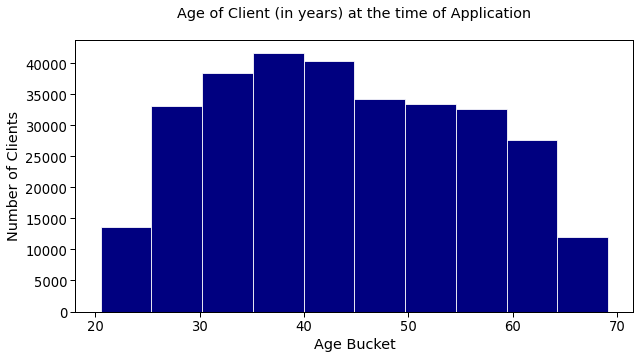

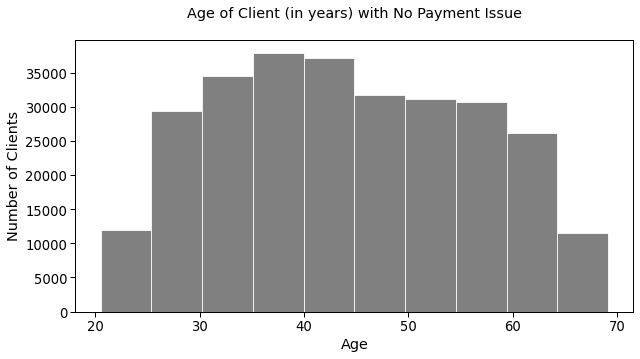

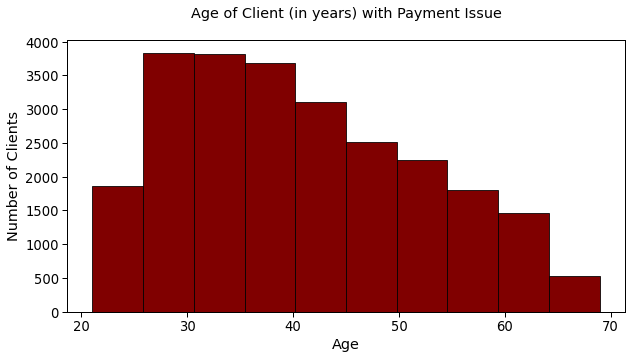

In [63]:
plt.figure(figsize=(10,5))
plt.hist(df_train['AGE'], bins=10, edgecolor='white', color='navy')
plt.title('Age of Client (in years) at the time of Application\n')
plt.xlabel('Age Bucket')
plt.ylabel('Number of Clients')
plt.show()

plt.figure(figsize=(10,5))
plt.hist(no_age, bins=10, edgecolor='w', color='grey')
plt.title('Age of Client (in years) with No Payment Issue\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

plt.figure(figsize=(10,5))
plt.hist(yes_age, bins=10, edgecolor='black', color='maroon')
plt.title('Age of Client (in years) with Payment Issue\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

#### Count Children vs Target

In [64]:
cdvt = pd.crosstab(df_train_cln['CNT_CHILDREN'], df_train_cln['TARGET'])
pcdvt = df_train_cln[['CNT_CHILDREN','TARGET']].groupby(['CNT_CHILDREN']).mean().sort_values(by=['TARGET'], ascending=False)
display(cdvt,pcdvt)

TARGET,0,1
CNT_CHILDREN,,
0,147615,13753
1,54300,5342
2,24056,2293
3,3277,352
4,360,54
5,75,6
6,13,6
7,7,0
8,2,0


,TARGET
CNT_CHILDREN,
9,1.000000
6,0.315789
4,0.130435
3,0.096996
1,0.089568
2,0.087024
0,0.085228
5,0.074074
7,0.000000


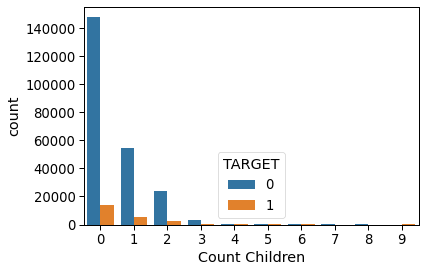

In [65]:
fig = plt.figure()  
ax = sns.countplot(data = df_train_cln, x='CNT_CHILDREN', hue = 'TARGET')
ax.set_xlabel('Count Children')
plt.show() 

#### Region Rating Client vs Target

In [66]:
rcvt = pd.crosstab(df_train_cln['REGION_RATING_CLIENT'], df_train_cln['TARGET'])
prcvt = df_train_cln[['REGION_RATING_CLIENT','TARGET']].groupby(['REGION_RATING_CLIENT']).mean().sort_values(by=['TARGET'], ascending=False)
display(rcvt,prcvt)

TARGET,0,1
REGION_RATING_CLIENT,,
1,26164,1376
2,169327,15708
3,34214,4724


,TARGET
REGION_RATING_CLIENT,
3,0.121321
2,0.084892
1,0.049964


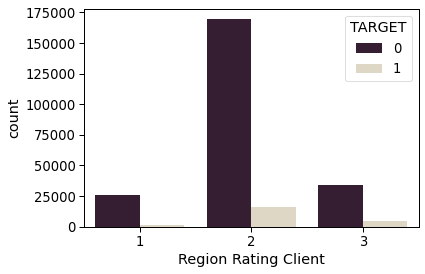

In [67]:
fig = plt.figure()  
ax = sns.countplot(data = df_train_cln, x='REGION_RATING_CLIENT', hue = 'TARGET', palette = 'ch:start=0.3,rot=0.4_r')
ax.set_xlabel('Region Rating Client')
plt.show() 

### Multivariate Analysis

Multivariate analysis (MVA) is based on the principles of multivariate statistics. Typically, MVA is used to address the situations where multiple measurements are made on each experimental unit and the relations among these measurements and their structures are important.

#### Amount Credit vs Target

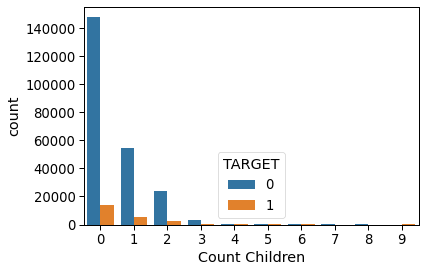

In [68]:
fig = plt.figure()  
ax = sns.countplot(data = df_train_cln, x='CNT_CHILDREN', hue = 'TARGET')
ax.set_xlabel('Count Children')
plt.show() 

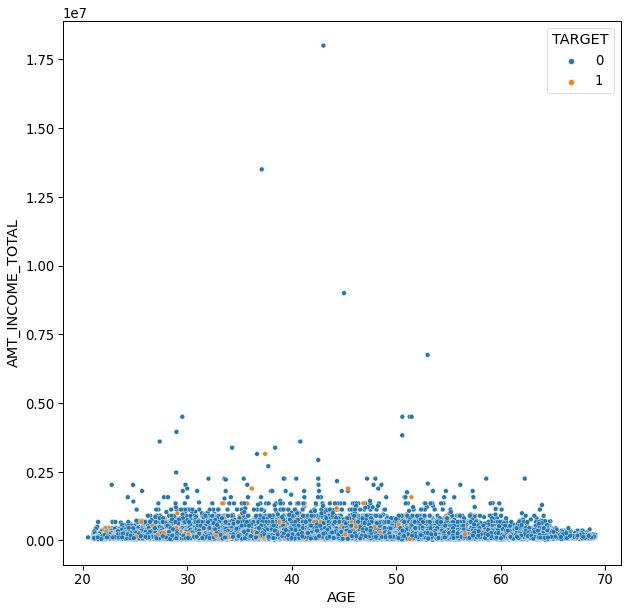

In [69]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(data = df_train_cln, x='AGE', y = 'AMT_INCOME_TOTAL', hue = 'TARGET')
plt.show() 

####  Gender, Amount Credit, Target, and Region Rating

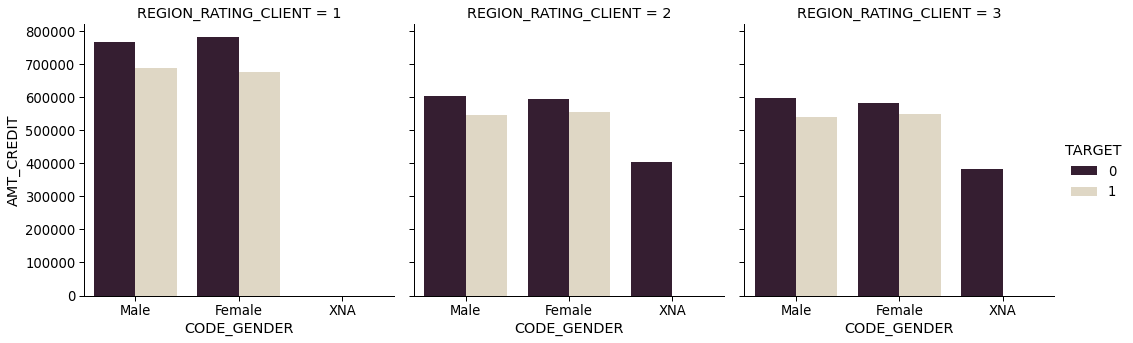

In [70]:
sns.catplot(x = 'CODE_GENDER',
            y = 'AMT_CREDIT', 
            hue = 'TARGET', 
            col = 'REGION_RATING_CLIENT', 
            kind = 'bar', palette = 'ch:start=0.3,rot=0.4_r',
            ci =None,
            data = df_train_cln)
plt.show()

#### Income Type, Amount of Income, Target, and Region Rating

In [71]:
df_train_cln['AMT_INCOME_TOTAL'].describe()

count    2.515130e+05
mean     1.754435e+05
std      1.135296e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.115000e+05
max      1.800009e+07
Name: AMT_INCOME_TOTAL, dtype: float64

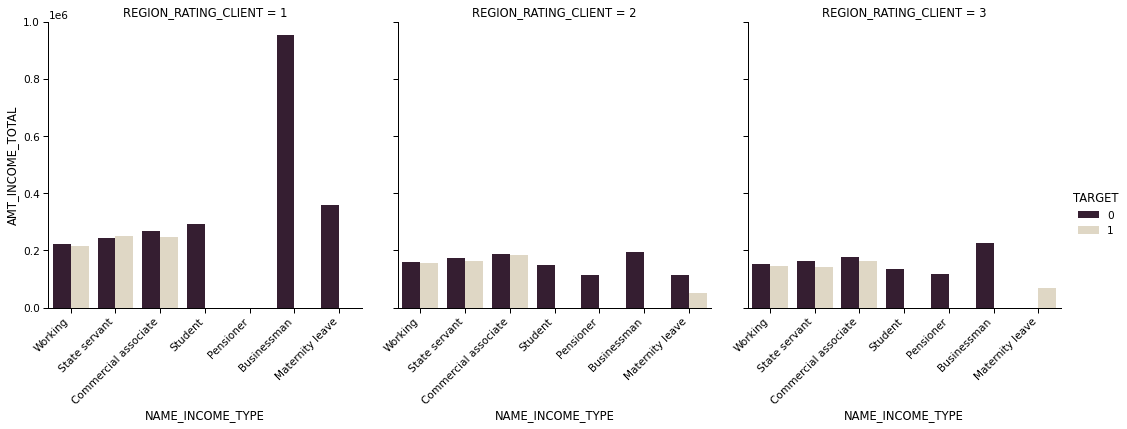

In [72]:
sns.set_context('paper', font_scale=1.2)
fig = sns.catplot(x = 'NAME_INCOME_TYPE',
            y = 'AMT_INCOME_TOTAL', 
            hue = 'TARGET', 
            col = 'REGION_RATING_CLIENT', 
            kind = 'bar', palette = 'ch:start=0.3,rot=0.4_r',
            ci =None,
            data = df_train_cln)
fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

#### Housing Type, Amount of Credit, Target, and Region Rating

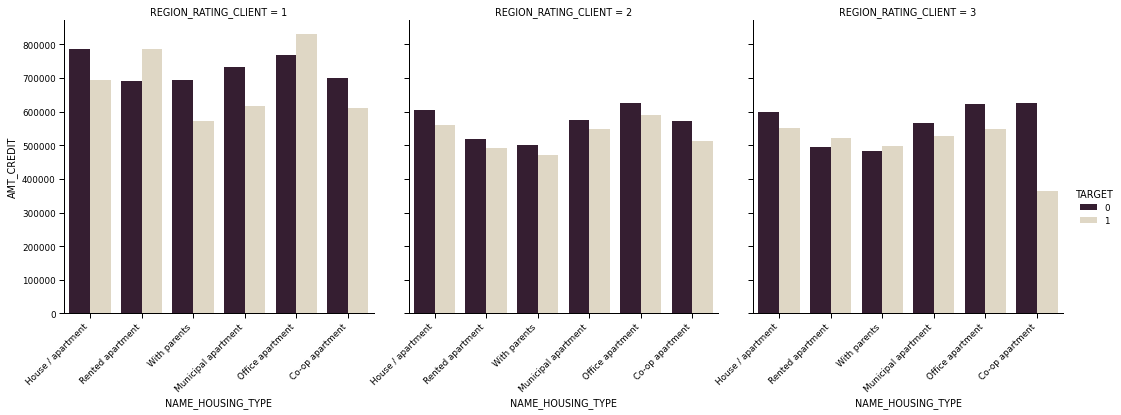

In [73]:
sns.set_context('paper', font_scale=1)
fig = sns.catplot(x = 'NAME_HOUSING_TYPE',
            y = 'AMT_CREDIT', 
            hue = 'TARGET', 
            col = 'REGION_RATING_CLIENT', 
            kind = 'bar', palette = 'ch:start=0.3,rot=0.4_r',
            ci =None,
            data = df_train_cln)
fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

**4. Education Type, Amount of Credit, Target, and Region Rating**

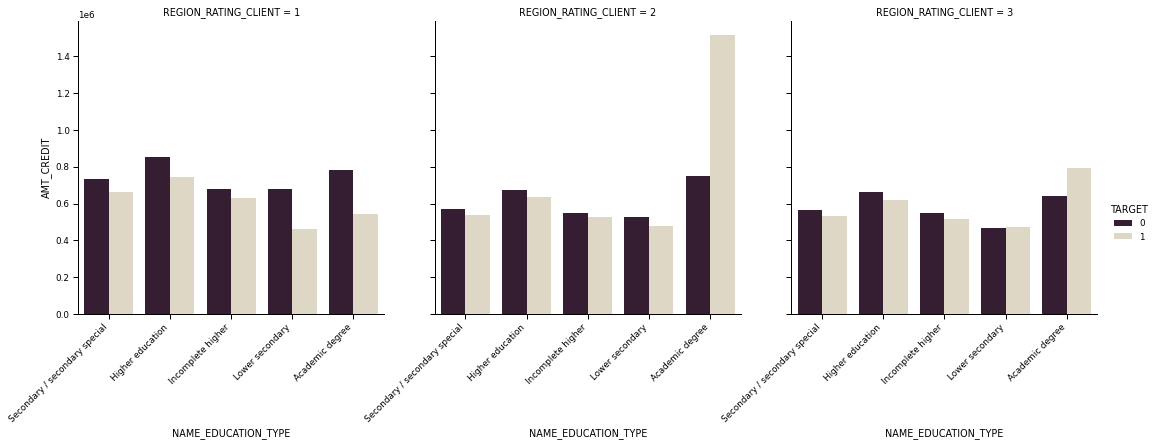

In [74]:
sns.set_context('paper', font_scale=1)
fig = sns.catplot(x = 'NAME_EDUCATION_TYPE',
            y = 'AMT_CREDIT', 
            hue = 'TARGET', 
            col = 'REGION_RATING_CLIENT', 
            kind = 'bar', palette = 'ch:start=0.3,rot=0.4_r',
            ci =None,
            data = df_train_cln)
fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

#### Family Status, Amount of Credit, Target, and Car Ownership

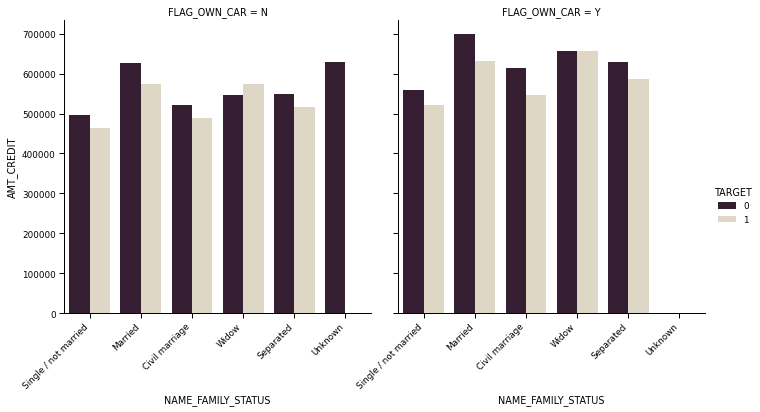

In [75]:
sns.set_context('paper', font_scale=1)
fig = sns.catplot(x = 'NAME_FAMILY_STATUS',
            y = 'AMT_CREDIT', 
            hue = 'TARGET', 
            col = 'FLAG_OWN_CAR', 
            kind = 'bar', palette = 'ch:start=0.3,rot=0.4_r',
            ci =None,
            data = df_train_cln)
fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

#### Family Status, Amount of Credit, Target, and Realty Ownership

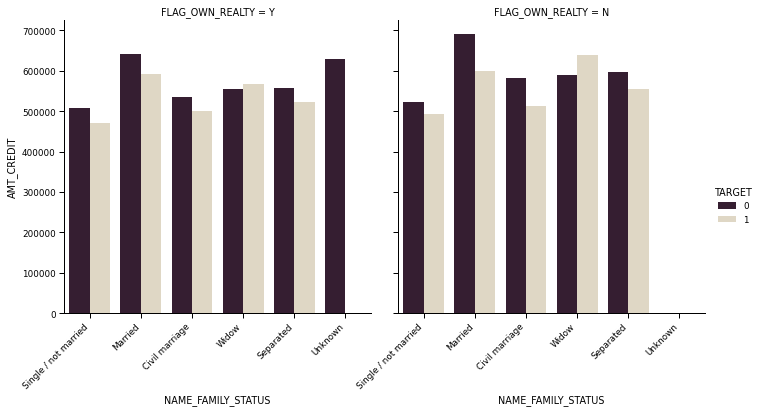

In [76]:
sns.set_context('paper', font_scale=1)
fig = sns.catplot(x = 'NAME_FAMILY_STATUS',
            y = 'AMT_CREDIT', 
            hue = 'TARGET', 
            col = 'FLAG_OWN_REALTY', 
            kind = 'bar', palette = 'ch:start=0.3,rot=0.4_r',
            ci =None,
            data = df_train_cln)
fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

#### Family Status, Amount of Credit, Target, and Gender

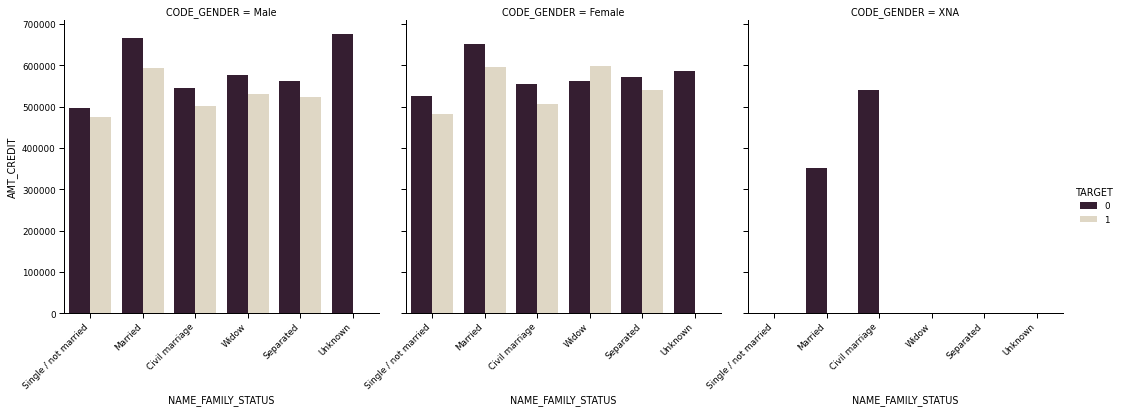

In [77]:
sns.set_context('paper', font_scale=1)
fig = sns.catplot(x = 'NAME_FAMILY_STATUS',
            y = 'AMT_CREDIT', 
            hue = 'TARGET', 
            col = 'CODE_GENDER', 
            kind = 'bar', palette = 'ch:start=0.3,rot=0.4_r',
            ci =None,
            data = df_train_cln)
fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

### Corelation

In [78]:
df_train_cln['TARGET']

0         1
1         0
2         0
3         0
4         0
         ..
307504    0
307506    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 251513, dtype: int64

In [79]:
correlations = df_train_cln.corr("spearman")['TARGET'].sort_values(ascending=False)

print('Most Positive Correlations: \n', correlations)

Most Positive Correlations: 
 TARGET                         1.000000
REGION_RATING_CLIENT_W_CITY    0.067485
REGION_RATING_CLIENT           0.065113
REG_CITY_NOT_WORK_CITY         0.043116
REG_CITY_NOT_LIVE_CITY         0.041791
FLAG_DOCUMENT_3                0.041313
DEF_30_CNT_SOCIAL_CIRCLE       0.036220
DEF_60_CNT_SOCIAL_CIRCLE       0.034085
LIVE_CITY_NOT_WORK_CITY        0.024360
FLAG_WORK_PHONE                0.019415
AMT_REQ_CREDIT_BUREAU_YEAR     0.016494
OBS_30_CNT_SOCIAL_CIRCLE       0.011338
OBS_60_CNT_SOCIAL_CIRCLE       0.011228
CNT_CHILDREN                   0.006933
FLAG_DOCUMENT_2                0.005646
REG_REGION_NOT_LIVE_REGION     0.004287
FLAG_DOCUMENT_21               0.003540
REG_REGION_NOT_WORK_REGION     0.001958
AMT_REQ_CREDIT_BUREAU_DAY      0.001905
FLAG_CONT_MOBILE               0.001039
FLAG_MOBIL                     0.000614
FLAG_EMP_PHONE                 0.000083
AMT_REQ_CREDIT_BUREAU_HOUR    -0.000167
FLAG_DOCUMENT_20              -0.000250
FLAG_DOCUM

In [80]:
correlations = df_train_cln.corr("spearman")['TARGET'].sort_values(ascending=False)

print('Most Positive Correlations: \n', correlations.head(6))
print('Most Negative Correlations: \n', correlations.tail(5))

Most Positive Correlations: 
 TARGET                         1.000000
REGION_RATING_CLIENT_W_CITY    0.067485
REGION_RATING_CLIENT           0.065113
REG_CITY_NOT_WORK_CITY         0.043116
REG_CITY_NOT_LIVE_CITY         0.041791
FLAG_DOCUMENT_3                0.041313
Name: TARGET, dtype: float64
Most Negative Correlations: 
 YEARS_LAST_PHONE_CHANGE   -0.058909
AGE                       -0.065283
YEARS_EMPLOYED            -0.080200
EXT_SOURCE_3              -0.141995
EXT_SOURCE_2              -0.155726
Name: TARGET, dtype: float64


In [81]:
df_corr = df_train_cln[['TARGET','REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT','REG_CITY_NOT_WORK_CITY','REG_CITY_NOT_LIVE_CITY','FLAG_DOCUMENT_3','YEARS_LAST_PHONE_CHANGE','AGE', 'YEARS_EMPLOYED', 'EXT_SOURCE_3','EXT_SOURCE_2']]
df_data_corrs = df_corr.corr()
df_data_corrs

,TARGET,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,FLAG_DOCUMENT_3,YEARS_LAST_PHONE_CHANGE,AGE,YEARS_EMPLOYED,EXT_SOURCE_3,EXT_SOURCE_2
TARGET,1.000000,0.067449,0.065103,0.043116,0.041791,0.041313,-0.060251,-0.065332,-0.075010,-0.155801,-0.170437
REGION_RATING_CLIENT_W_CITY,0.067449,1.000000,0.950228,0.041519,0.053462,0.093965,-0.025636,-0.039987,0.010408,-0.011354,-0.292138
REGION_RATING_CLIENT,0.065103,0.950228,1.000000,0.018569,0.042126,0.089081,-0.025851,-0.039852,0.011833,-0.011590,-0.296668
REG_CITY_NOT_WORK_CITY,0.043116,0.041519,0.018569,1.000000,0.447086,-0.008962,-0.059566,-0.112483,-0.128492,-0.048341,-0.092646
REG_CITY_NOT_LIVE_CITY,0.041791,0.053462,0.042126,0.447086,1.000000,-0.022866,-0.062390,-0.164906,-0.114058,-0.061596,-0.050361
FLAG_DOCUMENT_3,0.041313,0.093965,0.089081,-0.008962,-0.022866,1.000000,0.055233,0.071358,0.047353,-0.003188,-0.048953
YEARS_LAST_PHONE_CHANGE,-0.060251,-0.025636,-0.025851,-0.059566,-0.062390,0.055233,1.000000,0.141024,0.141875,0.072470,0.201861
AGE,-0.065332,-0.039987,-0.039852,-0.112483,-0.164906,0.071358,0.141024,1.000000,0.351499,0.153880,0.149969
YEARS_EMPLOYED,-0.075010,0.010408,0.011833,-0.128492,-0.114058,0.047353,0.141875,0.351499,1.000000,0.112159,0.092867
EXT_SOURCE_3,-0.155801,-0.011354,-0.011590,-0.048341,-0.061596,-0.003188,0.072470,0.153880,0.112159,1.000000,0.103518


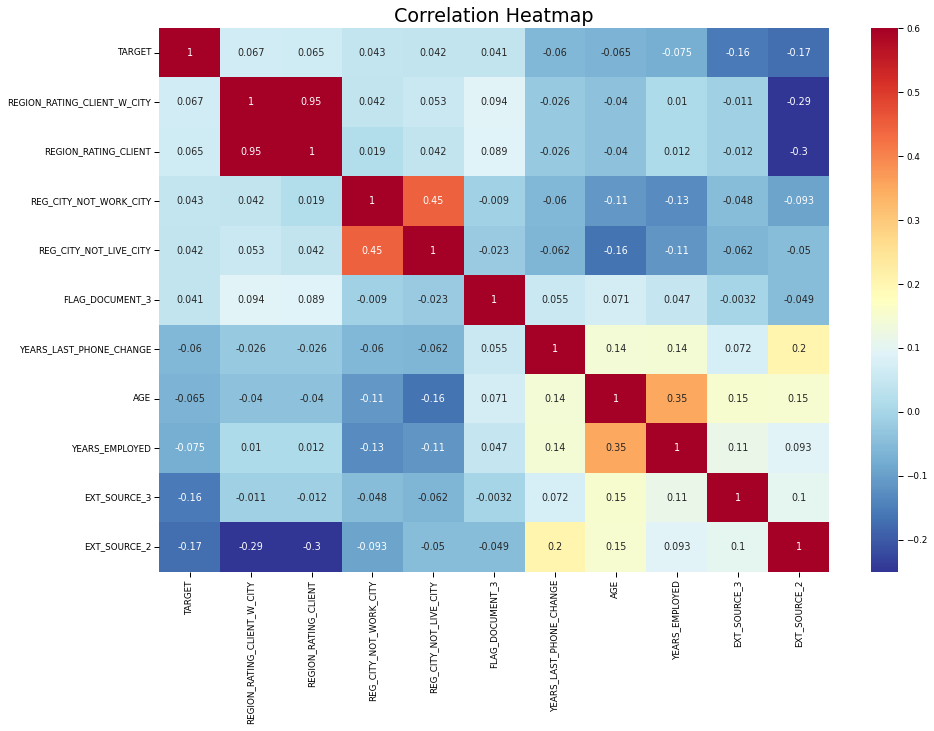

In [82]:
plt.figure(figsize = (15, 10))

sns.heatmap(df_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)

sns.set_context('paper', font_scale=2)
plt.title('Correlation Heatmap');

## Machine Learning Modelling

### Additional Data Preparation before modeling

#### Drop unnecessary features

In [83]:
df_train_cln.drop(['SK_ID_CURR'], inplace=True, axis=1)

In [84]:
df_train_cln

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,Male,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.920548,1.745205,9.994521,5.808219,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,3.106849,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,Female,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,2.268493,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,Male,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.180822,0.616438,11.671233,6.934247,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,2.232877,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,Female,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.068493,8.326027,26.939726,6.676712,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,1.690411,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,Cash loans,Male,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54.608219,8.323288,11.810959,9.473973,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,3.030137,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,0,Cash loans,Female,N,Y,0,153000.0,331920.0,16096.5,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,House / apartment,0.022625,45.767123,19.884932,26.843836,0.709589,1,1,0,1,0,0,Sales staff,1.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Self-employed,0.530725,0.535276,0.0,0.0,0.0,0.0,-0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307506,0,Cash loans,Male,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,25.5534

#### Handling Imbalance Data

In [85]:
df_train_cln["TARGET"].value_counts()

0    229705
1     21808
Name: TARGET, dtype: int64

In [86]:
from sklearn.utils import resample #re-sampling

# create two different dataframe of majority and minority class 
df_majority = df_train_cln[(df_train_cln['TARGET']==0)] 
df_minority = df_train_cln[(df_train_cln['TARGET']==1)] 

# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 229705, # to match majority class
                                 random_state=42)  # reproducible results

# combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

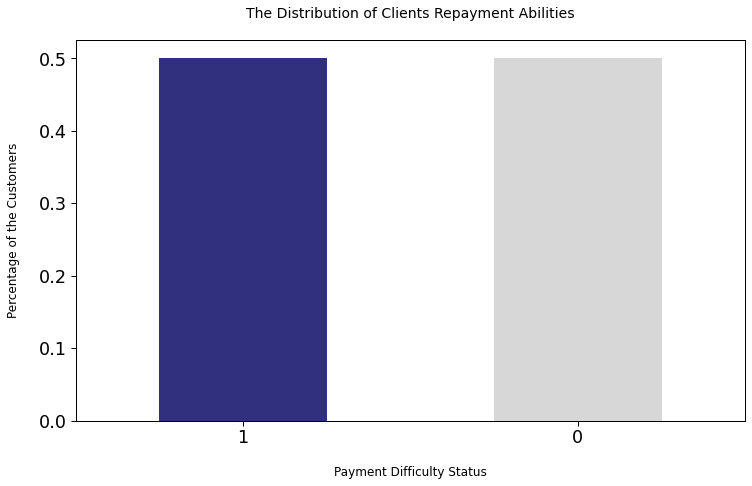

In [87]:
fig = plt.figure(figsize = (12,7))
df_upsampled['TARGET'].value_counts(normalize=True).plot(kind='bar', color= ['midnightblue','lightgrey'], alpha = 0.9, rot=0)
plt.title('The Distribution of Clients Repayment Abilities\n', fontsize=14)
plt.ylabel('Percentage of the Customers\n', fontsize=12)
plt.xlabel('\nPayment Difficulty Status', fontsize=12)
plt.show()

### Categorical Encoding

Typically, any structured dataset includes multiple columns – a combination of numerical as well as categorical variables. A machine can only understand the numbers. It cannot understand the text. That’s primarily the reason we need to convert categorical columns to numerical columns so that a machine learning algorithm understands it. This process is called categorical encoding.

There are multiple ways of handling Categorical variables.\
**-Label Encoding**\
**-One-Hot Encoding**

Label Encoding is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering.

One-Hot Encoding is another popular technique for treating categorical variables. It simply creates additional features based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature.

At the next step, we will compare spliting data with and without feature selection, so we will use Label Encoding instead, but also we attach code for One Hot Encoding

#### One Hot Encoding

In [88]:
df_OHE = pd.get_dummies(df_upsampled)
df_OHE

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_Female,CODE_GENDER_Male,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATIO

#### Label Encoding

In [89]:
df_LE = df_upsampled

In [90]:
from sklearn.preprocessing import LabelEncoder
# label encoder for object features
df_LE[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]] = df_train[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]].apply(LabelEncoder().fit_transform)

### Spliting Data

#### Without Feature Selection

In [91]:
# defining feature matrix(X) and response vector(y)
X_norm = df_LE.drop(['TARGET'], axis = 1)
y_norm = df_LE['TARGET']

#### With Feature Selection

We will do Feature Selection to see which features correlate well with payment difficulties

In [92]:
from sklearn.feature_selection import SelectKBest #feature selection
from sklearn.feature_selection import chi2
from sklearn.utils import resample #re-sampling
from sklearn.model_selection import train_test_split #data splitting
from sklearn.preprocessing import StandardScaler #normalize features

# feature selection
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_norm,y_norm)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_norm.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Features', 'Score']
featureScores.sort_values(by=['Score'], ascending=False)

,Features,Score
8,AMT_GOODS_PRICE,9.886521e+08
6,AMT_CREDIT,6.785753e+08
5,AMT_INCOME_TOTAL,9.794241e+07
7,AMT_ANNUITY,4.884780e+06
16,YEARS_EMPLOYED,5.735157e+04
15,AGE,1.558276e+04
44,YEARS_LAST_PHONE_CHANGE,1.122461e+04
17,YEARS_REGISTRATION,1.099720e+04
18,YEARS_ID_PUBLISH,5.339786e+03
11,NAME_EDUCATION_TYPE,3.478061e+03


It can be seen from the table which features that has well correlation with target:

1. **Best features**: `DAYS_EMPLOYED`, `AMT_GOODS_PRICE`, and `AMT_CREDIT`

2. **Worst features**: `FLAG_MOBIL`, `FLAG_CONT_MOBILE`, and `AMT_REQ_CREDIT_BUREAU_HOUR`

We will split the data, so we get new data with the 20 best features

In [93]:
X_split = df_LE[['YEARS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_CREDIT', 
                           'AGE', 'AMT_INCOME_TOTAL', 'YEARS_REGISTRATION', 
                           'YEARS_LAST_PHONE_CHANGE', 'YEARS_ID_PUBLISH', 'AMT_ANNUITY', 
                           'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'REG_CITY_NOT_WORK_CITY',
                          'CODE_GENDER', 'EXT_SOURCE_2', 'REG_CITY_NOT_LIVE_CITY', 'NAME_EDUCATION_TYPE',
                          'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_3', 'DEF_60_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY']]
y_split = df_LE['TARGET']

#### Train and Test Split

For comparing model with and without Feature Selection. We're going to differentiate the data.\
**"train, test"** = Data without Feature Selection\
**"train1, test1"** = Data with Feature Selection

In [94]:
# Without Feature Selection 
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.2, random_state=1)

In [95]:
# With Feature Selection 
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_split, y_split, test_size=0.2, random_state=1)

In [96]:
#normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.fit_transform(X_test1)

### Modeling and Evaluation

#### 1. Logistic Regression

##### Without Feature Selection

In [97]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=2000)
lr = lr.fit(X_train, y_train)

In [98]:
# predict data train
y_train_pred_lr = lr.predict(X_train)

# predict data test
y_test_pred_lr = lr.predict(X_test)

# print classification report (Train)
print('Classification Report Training Model (Logistic Regression):')
print(classification_report(y_train, y_train_pred_lr))

# print classification report (Train)
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred_lr))

Classification Report Training Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.68      0.68      0.68    183713
           1       0.68      0.68      0.68    183815

    accuracy                           0.68    367528
   macro avg       0.68      0.68      0.68    367528
weighted avg       0.68      0.68      0.68    367528

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.68      0.68      0.68     45992
           1       0.68      0.68      0.68     45890

    accuracy                           0.68     91882
   macro avg       0.68      0.68      0.68     91882
weighted avg       0.68      0.68      0.68     91882



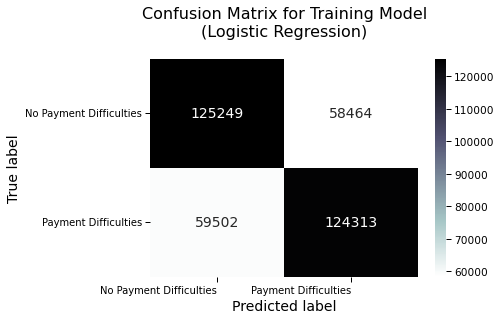

In [99]:
# form confusion matrix as a dataFrame
from sklearn.metrics import confusion_matrix, classification_report 

confusion_matrix_train_lr = pd.DataFrame((confusion_matrix(y_train, y_train_pred_lr)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
sns.set_context('paper', font_scale=1.2)
plt.figure()
heatmap = sns.heatmap(confusion_matrix_train_lr, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)\n', fontsize=16, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

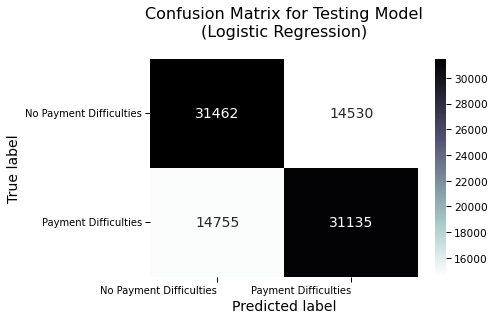

In [100]:
# form confusion matrix as a dataFrame
from sklearn.metrics import confusion_matrix, classification_report 

confusion_matrix_test_lr = pd.DataFrame((confusion_matrix(y_test, y_test_pred_lr)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
sns.set_context('paper', font_scale=1.2)
plt.figure()
heatmap = sns.heatmap(confusion_matrix_test_lr, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=16, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [101]:
acc_log_train=round(lr.score(X_train,y_train)*100,4)
acc_log_test=round(lr.score(X_test,y_test)*100,4)
print("Training Accuracy: % {}".format(acc_log_train))
print("Test Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 67.9029
Test Accuracy: % 68.1276


In [102]:
# ROC scores
roc_auc_rf = round(roc_auc_score(y_test, y_test_pred_lr),4)
print('ROC AUC:', roc_auc_rf)

ROC AUC: 0.6813


##### With Feature Selection

In [103]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression(max_iter=2000)
lr1 = lr1.fit(X_train1, y_train1)

In [104]:
# predict data train
y_train_pred_lr1 = lr1.predict(X_train1)

# predict data test
y_test_pred_lr1 = lr1.predict(X_test1)

# print classification report (Train)
print('Classification Report Training Model (Logistic Regression):')
print(classification_report(y_train1, y_train_pred_lr1))

# print classification report (Train)
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test1, y_test_pred_lr1))

Classification Report Training Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.67      0.68      0.68    183713
           1       0.68      0.67      0.67    183815

    accuracy                           0.67    367528
   macro avg       0.67      0.67      0.67    367528
weighted avg       0.67      0.67      0.67    367528

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.67      0.68      0.68     45992
           1       0.68      0.67      0.67     45890

    accuracy                           0.68     91882
   macro avg       0.68      0.68      0.68     91882
weighted avg       0.68      0.68      0.68     91882



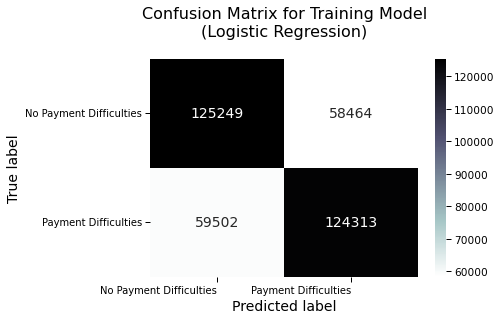

In [105]:
# form confusion matrix as a dataFrame
from sklearn.metrics import confusion_matrix, classification_report 

confusion_matrix_train_lr1 = pd.DataFrame((confusion_matrix(y_train1, y_train_pred_lr1)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
sns.set_context('paper', font_scale=1.2)
plt.figure()
heatmap = sns.heatmap(confusion_matrix_train_lr, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)\n', fontsize=16, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

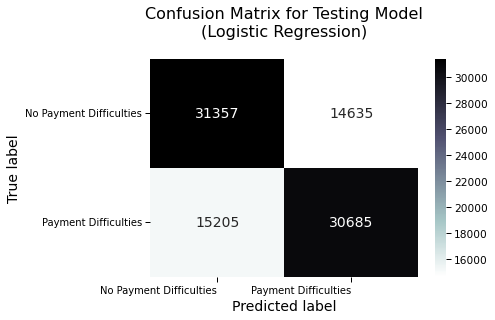

In [184]:
# form confusion matrix as a dataFrame
from sklearn.metrics import confusion_matrix, classification_report 

confusion_matrix_test_lr1 = pd.DataFrame((confusion_matrix(y_test1, y_test_pred_lr1)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
sns.set_context('paper', font_scale=1.2)
plt.figure()
heatmap = sns.heatmap(confusion_matrix_test_lr1, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=16, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [107]:
acc_log_train1=round(lr1.score(X_train1,y_train1)*100,4)
acc_log_test1=round(lr1.score(X_test1,y_test1)*100,4)
print("Training Accuracy: % {}".format(acc_log_train1))
print("Test Accuracy: % {}".format(acc_log_test1))

Training Accuracy: % 67.3358
Test Accuracy: % 67.5236


##### Summary

In [108]:
print("Training Accuracy(without): % {}".format(acc_log_train))
print("Test Accuracy(without): % {}".format(acc_log_test))

print("Training Accuracy(with): % {}".format(acc_log_train1))
print("Test Accuracy(with): % {}".format(acc_log_test1))

Training Accuracy(without): % 67.9029
Test Accuracy(without): % 68.1276
Training Accuracy(with): % 67.3358
Test Accuracy(with): % 67.5236


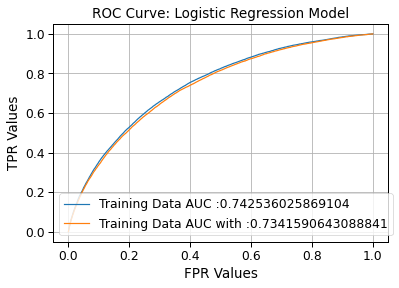

In [109]:
train_fpr_lr, train_tpr_lr, tr_thresholds_lr = roc_curve(y_train,lr.predict_proba(X_train)[:,1])
train_fpr_lr1, train_tpr_lr1, tr_thresholds_lr1 = roc_curve(y_train1,lr1.predict_proba(X_train1)[:,1])

sns.set_context('paper', font_scale=1.4)

plt.plot(train_fpr_lr,train_tpr_lr, label ="Training Data AUC :" + str(auc(train_fpr_lr,train_tpr_lr)))
plt.plot(train_fpr_lr1,train_tpr_lr1, label ="Training Data AUC with :" + str(auc(train_fpr_lr1,train_tpr_lr1)))
plt.legend()

plt.xlabel("FPR Values")
plt.ylabel("TPR Values")
plt.title('ROC Curve: Logistic Regression Model')

plt.grid(True)
plt.show()

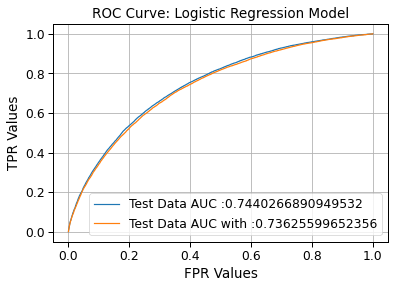

In [110]:
test_fpr_lr, test_tpr_lr, tr_thresholds_lr = roc_curve(y_test,lr.predict_proba(X_test)[:,1])
test_fpr_lr1, test_tpr_lr1, tr_thresholds_lr1 = roc_curve(y_test1,lr1.predict_proba(X_test1)[:,1])

sns.set_context('paper', font_scale=1.4)

plt.plot(test_fpr_lr,test_tpr_lr, label ="Test Data AUC :" + str(auc(test_fpr_lr,test_tpr_lr)))
plt.plot(test_fpr_lr1,test_tpr_lr1, label ="Test Data AUC with :" + str(auc(test_fpr_lr1,test_tpr_lr1)))
plt.legend()

plt.xlabel("FPR Values")
plt.ylabel("TPR Values")
plt.title('ROC Curve: Logistic Regression Model')

plt.grid(True)
plt.show()

#### 2. Decision Tree

##### Without Feature Selection

In [111]:
#Decision Tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 

dt = DecisionTreeClassifier().fit(X_train,y_train)

In [112]:
# predict data train
y_train_pred_dt = dt.predict(X_train)

# predict data test
y_test_pred_dt = dt.predict(X_test)

# print classification report (Train)
print('Classification Report Training Model (Decision Tree):')
print(classification_report(y_train, y_train_pred_dt))

# print classification report (Test)
print('Classification Report Testing Model (Decision Tree):')
print(classification_report(y_test, y_test_pred_dt))

Classification Report Training Model (Decision Tree):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    183713
           1       1.00      1.00      1.00    183815

    accuracy                           1.00    367528
   macro avg       1.00      1.00      1.00    367528
weighted avg       1.00      1.00      1.00    367528

Classification Report Testing Model (Decision Tree):
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     45992
           1       0.90      0.90      0.90     45890

    accuracy                           0.90     91882
   macro avg       0.90      0.90      0.90     91882
weighted avg       0.90      0.90      0.90     91882



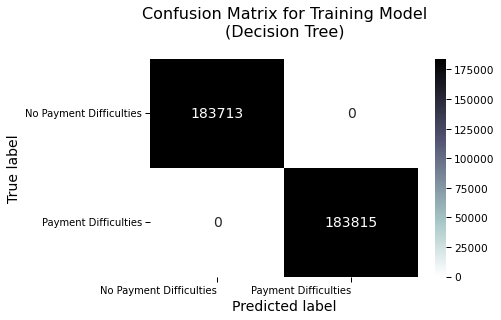

In [113]:
# form confusion matrix as a dataFrame
from sklearn.metrics import confusion_matrix, classification_report 

confusion_matrix_train_dt = pd.DataFrame((confusion_matrix(y_train, y_train_pred_dt)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
sns.set_context('paper', font_scale=1.2)
plt.figure()
heatmap = sns.heatmap(confusion_matrix_train_dt, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)

plt.title('Confusion Matrix for Training Model\n(Decision Tree)\n', fontsize=16, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

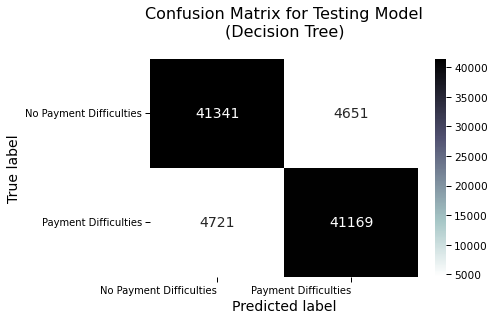

In [114]:
# form confusion matrix as a dataFrame
from sklearn.metrics import confusion_matrix, classification_report 

confusion_matrix_test_dt = pd.DataFrame((confusion_matrix(y_test, y_test_pred_dt)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
sns.set_context('paper', font_scale=1.2)
plt.figure()
heatmap = sns.heatmap(confusion_matrix_test_dt, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)

plt.title('Confusion Matrix for Testing Model\n(Decision Tree)\n', fontsize=16, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [115]:
acc_dt_train=round(dt.score(X_train,y_train)*100,4)
acc_dt_test=round(dt.score(X_test,y_test)*100,4)
print("Training Accuracy: % {}".format(acc_dt_train))
print("Test Accuracy: % {}".format(acc_dt_test))

Training Accuracy: % 100.0
Test Accuracy: % 89.8


##### With Feature Selection

In [116]:
#Decision Tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 

dt1 = DecisionTreeClassifier().fit(X_train1,y_train1)

In [117]:
# predict data train
y_train_pred_dt1 = dt1.predict(X_train1)

# predict data test
y_test_pred_dt1 = dt1.predict(X_test1)

# print classification report (Train)
print('Classification Report Training Model (Decision Tree):')
print(classification_report(y_train1, y_train_pred_dt1))

# print classification report (Train)
print('Classification Report Testing Model (Decision Tree):')
print(classification_report(y_test1, y_test_pred_dt1))

Classification Report Training Model (Decision Tree):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    183713
           1       1.00      1.00      1.00    183815

    accuracy                           1.00    367528
   macro avg       1.00      1.00      1.00    367528
weighted avg       1.00      1.00      1.00    367528

Classification Report Testing Model (Decision Tree):
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     45992
           1       0.89      0.86      0.88     45890

    accuracy                           0.88     91882
   macro avg       0.88      0.88      0.88     91882
weighted avg       0.88      0.88      0.88     91882



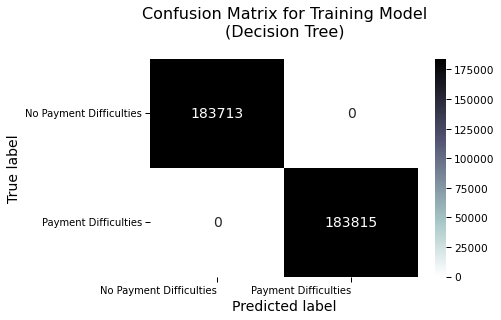

In [118]:
# form confusion matrix as a dataFrame
from sklearn.metrics import confusion_matrix, classification_report 

confusion_matrix_train_dt1 = pd.DataFrame((confusion_matrix(y_train1, y_train_pred_dt1)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
sns.set_context('paper', font_scale=1.2)
plt.figure()
heatmap = sns.heatmap(confusion_matrix_train_dt1, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)

plt.title('Confusion Matrix for Training Model\n(Decision Tree)\n', fontsize=16, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

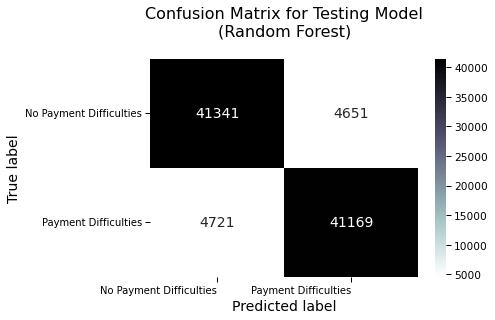

In [119]:
# form confusion matrix as a dataFrame
from sklearn.metrics import confusion_matrix, classification_report 

confusion_matrix_test_dt1 = pd.DataFrame((confusion_matrix(y_test1, y_test_pred_dt)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
sns.set_context('paper', font_scale=1.2)
plt.figure()
heatmap = sns.heatmap(confusion_matrix_test_dt1, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=16, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [120]:
acc_dt_train1=round(dt1.score(X_train1,y_train1)*100,4)
acc_dt_test1=round(dt1.score(X_test1,y_test1)*100,4)
print("Training Accuracy: % {}".format(acc_dt_train1))
print("Test Accuracy: % {}".format(acc_dt_test1))

Training Accuracy: % 100.0
Test Accuracy: % 87.8007


##### Summary

In [121]:
print("Training Accuracy(without): % {}".format(acc_dt_train))
print("Test Accuracy(without): % {}".format(acc_dt_test))

print("Training Accuracy(with): % {}".format(acc_dt_train1))
print("Test Accuracy(with): % {}".format(acc_dt_test1))

Training Accuracy(without): % 100.0
Test Accuracy(without): % 89.8
Training Accuracy(with): % 100.0
Test Accuracy(with): % 87.8007


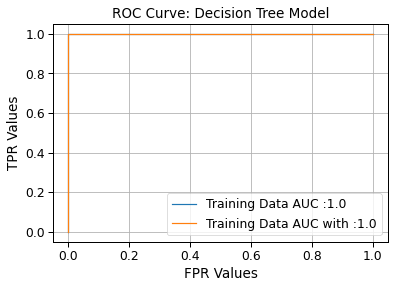

In [157]:
train_fpr_dt, train_tpr_dt, tr_thresholds_dt = roc_curve(y_train,dt.predict_proba(X_train)[:,1])
train_fpr_dt1, train_tpr_dt1, tr_thresholds_dt1 = roc_curve(y_train1,dt1.predict_proba(X_train1)[:,1])

sns.set_context('paper', font_scale=1.4)

plt.plot(train_fpr_dt,train_tpr_dt, label ="Training Data AUC :" + str(auc(train_fpr_dt,train_tpr_dt)))
plt.plot(train_fpr_dt1,train_tpr_dt1, label ="Training Data AUC with :" + str(auc(train_fpr_dt1,train_tpr_dt1)))
plt.legend()

plt.xlabel("FPR Values")
plt.ylabel("TPR Values")
plt.title('ROC Curve: Decision Tree Model')

plt.grid(True)
plt.show()

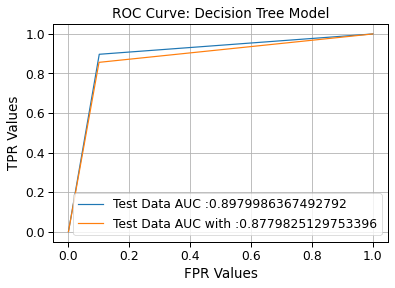

In [158]:
test_fpr_dt, test_tpr_dt, tr_thresholds_dt = roc_curve(y_test,dt.predict_proba(X_test)[:,1])
test_fpr_dt1, test_tpr_dt1, tr_thresholds_dt1 = roc_curve(y_test1,dt1.predict_proba(X_test1)[:,1])

sns.set_context('paper', font_scale=1.4)

plt.plot(test_fpr_dt,test_tpr_dt, label ="Test Data AUC :" + str(auc(test_fpr_dt,test_tpr_dt)))
plt.plot(test_fpr_dt1,test_tpr_dt1, label ="Test Data AUC with :" + str(auc(test_fpr_dt1,test_tpr_dt1)))
plt.legend()

plt.xlabel("FPR Values")
plt.ylabel("TPR Values")
plt.title('ROC Curve: Decision Tree Model')

plt.grid(True)
plt.show()

#### 3. Random Forest

##### Without Feature Selection

In [122]:
#Random Forest
rf = RandomForestClassifier().fit(X_train, y_train)

In [123]:
# predict data train
y_train_pred_rf = rf.predict(X_train)

# predict data test
y_test_pred_rf = rf.predict(X_test)

# print classification report (Train)
print('Classification Report Training Model (Random Forest):')
print(classification_report(y_train, y_train_pred_rf))

# print classification report (Test)
print('Classification Report Testing Model (Random Forest):')
print(classification_report(y_test, y_test_pred_rf))

Classification Report Training Model (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    183713
           1       1.00      1.00      1.00    183815

    accuracy                           1.00    367528
   macro avg       1.00      1.00      1.00    367528
weighted avg       1.00      1.00      1.00    367528

Classification Report Testing Model (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45992
           1       1.00      1.00      1.00     45890

    accuracy                           1.00     91882
   macro avg       1.00      1.00      1.00     91882
weighted avg       1.00      1.00      1.00     91882



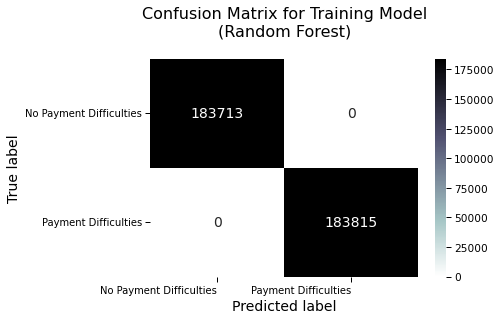

In [124]:
# form confusion matrix as a dataFrame
from sklearn.metrics import confusion_matrix, classification_report 

confusion_matrix_train_rf = pd.DataFrame((confusion_matrix(y_train, y_train_pred_rf)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
sns.set_context('paper', font_scale=1.2)
plt.figure()
heatmap = sns.heatmap(confusion_matrix_train_rf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)

plt.title('Confusion Matrix for Training Model\n(Random Forest)\n', fontsize=16, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

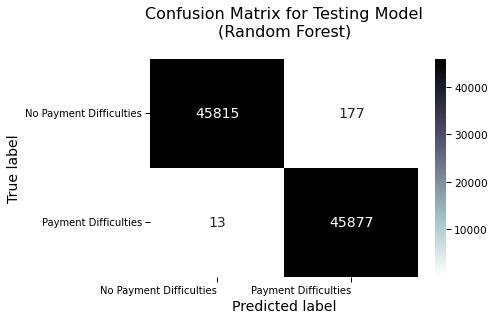

In [125]:
# form confusion matrix as a dataFrame
from sklearn.metrics import confusion_matrix, classification_report 

confusion_matrix_test_rf = pd.DataFrame((confusion_matrix(y_test, y_test_pred_rf)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
sns.set_context('paper', font_scale=1.2)
plt.figure()
heatmap = sns.heatmap(confusion_matrix_test_rf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=16, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [126]:
acc_rf_train=round(rf.score(X_train,y_train)*100,4)
acc_rf_test=round(rf.score(X_test,y_test)*100,4)
print("Training Accuracy: % {}".format(acc_rf_train))
print("Test Accuracy: % {}".format(acc_rf_test))

Training Accuracy: % 100.0
Test Accuracy: % 99.7932


##### With Feature Selection

In [127]:
#Decision Tree
rf1 = RandomForestClassifier().fit(X_train1, y_train1)

In [128]:
# predict data train
y_train_pred_rf1 = rf1.predict(X_train1)

# predict data test
y_test_pred_rf1 = rf1.predict(X_test1)

# print classification report (Train)
print('Classification Report Training Model (Random Forest):')
print(classification_report(y_train1, y_train_pred_rf1))

# print classification report (Train)
print('Classification Report Testing Model (Random Forest):')
print(classification_report(y_test1, y_test_pred_rf1))

Classification Report Training Model (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    183713
           1       1.00      1.00      1.00    183815

    accuracy                           1.00    367528
   macro avg       1.00      1.00      1.00    367528
weighted avg       1.00      1.00      1.00    367528

Classification Report Testing Model (Random Forest):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     45992
           1       0.99      1.00      1.00     45890

    accuracy                           1.00     91882
   macro avg       1.00      1.00      1.00     91882
weighted avg       1.00      1.00      1.00     91882



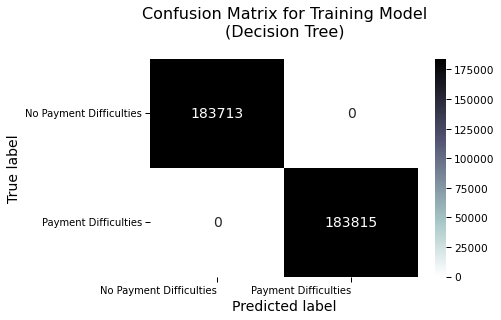

In [129]:
# form confusion matrix as a dataFrame
from sklearn.metrics import confusion_matrix, classification_report 

confusion_matrix_train_rf1 = pd.DataFrame((confusion_matrix(y_train1, y_train_pred_rf1)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
sns.set_context('paper', font_scale=1.2)
plt.figure()
heatmap = sns.heatmap(confusion_matrix_train_rf1, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)

plt.title('Confusion Matrix for Training Model\n(Decision Tree)\n', fontsize=16, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

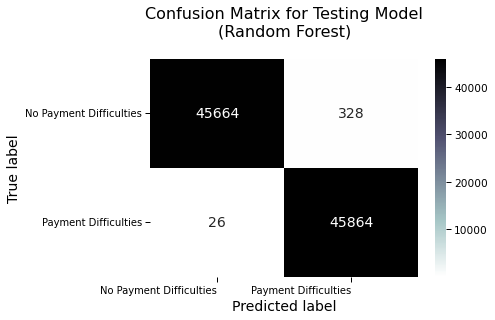

In [130]:
# form confusion matrix as a dataFrame
from sklearn.metrics import confusion_matrix, classification_report 

confusion_matrix_test_rf1 = pd.DataFrame((confusion_matrix(y_test1, y_test_pred_rf1)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
sns.set_context('paper', font_scale=1.2)
plt.figure()
heatmap = sns.heatmap(confusion_matrix_test_rf1, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=16, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [131]:
acc_rf1_train1=round(rf1.score(X_train1,y_train1)*100,4)
acc_rf1_test1=round(rf1.score(X_test1,y_test1)*100,4)
print("Training Accuracy: % {}".format(acc_rf1_train1))
print("Test Accuracy: % {}".format(acc_rf1_test1))

Training Accuracy: % 100.0
Test Accuracy: % 99.6147


##### Summary

In [132]:
print("Training Accuracy(without): % {}".format(acc_rf_train))
print("Test Accuracy(without): % {}".format(acc_rf_test))

print("Training Accuracy(with): % {}".format(acc_rf1_train1))
print("Test Accuracy(with): % {}".format(acc_rf1_test1))

Training Accuracy(without): % 100.0
Test Accuracy(without): % 99.7932
Training Accuracy(with): % 100.0
Test Accuracy(with): % 99.6147


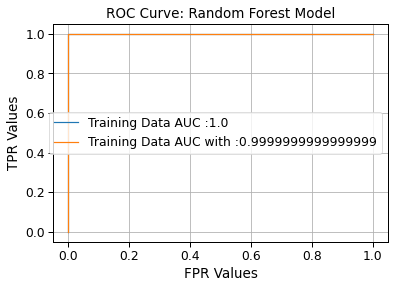

In [155]:
train_fpr_rf, train_tpr_rf, tr_thresholds_rf = roc_curve(y_train,rf.predict_proba(X_train)[:,1])
train_fpr_rf1, train_tpr_rf1, tr_thresholds_rf1 = roc_curve(y_train1,rf1.predict_proba(X_train1)[:,1])

sns.set_context('paper', font_scale=1.4)

plt.plot(train_fpr_rf,train_tpr_rf, label ="Training Data AUC :" + str(auc(train_fpr_rf,train_tpr_rf)))
plt.plot(train_fpr_rf1,train_tpr_rf1, label ="Training Data AUC with :" + str(auc(train_fpr_rf1,train_tpr_rf1)))
plt.legend()

plt.xlabel("FPR Values")
plt.ylabel("TPR Values")
plt.title('ROC Curve: Random Forest Model')

plt.grid(True)
plt.show()

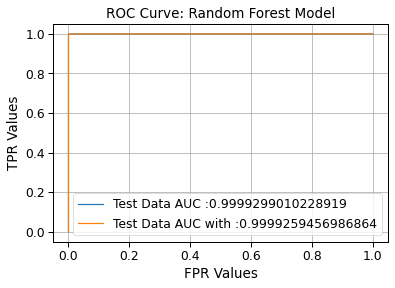

In [156]:
test_fpr_rf, test_tpr_rf, tr_thresholds_rf = roc_curve(y_test,rf.predict_proba(X_test)[:,1])
test_fpr_rf1, test_tpr_rf1, tr_thresholds_rf1 = roc_curve(y_test1,rf1.predict_proba(X_test1)[:,1])

sns.set_context('paper', font_scale=1.4)

plt.plot(test_fpr_rf,test_tpr_rf, label ="Test Data AUC :" + str(auc(test_fpr_rf,test_tpr_rf)))
plt.plot(test_fpr_rf1,test_tpr_rf1, label ="Test Data AUC with :" + str(auc(test_fpr_rf1,test_tpr_rf1)))
plt.legend()

plt.xlabel("FPR Values")
plt.ylabel("TPR Values")
plt.title('ROC Curve: Random Forest Model')

plt.grid(True)
plt.show()

#### 4. K-Nearest Neighbors

##### Without Feature Selection

In [133]:
#KNN
knn = KNeighborsClassifier().fit(X_train,y_train)

In [134]:
# predict data train
y_train_pred_knn = knn.predict(X_train)

# predict data test
y_test_pred_knn = knn.predict(X_test)

# print classification report (Train)
print('Classification Report Training Model (K-Nearest Neighbors):')
print(classification_report(y_train, y_train_pred_knn))

# print classification report (Test)
print('Classification Report Testing Model (K-Nearest Neighbors):')
print(classification_report(y_test, y_test_pred_knn))

Classification Report Training Model (K-Nearest Neighbors):
              precision    recall  f1-score   support

           0       1.00      0.82      0.90    183713
           1       0.85      1.00      0.92    183815

    accuracy                           0.91    367528
   macro avg       0.92      0.91      0.91    367528
weighted avg       0.92      0.91      0.91    367528

Classification Report Testing Model (K-Nearest Neighbors):
              precision    recall  f1-score   support

           0       0.99      0.74      0.85     45992
           1       0.79      0.99      0.88     45890

    accuracy                           0.87     91882
   macro avg       0.89      0.87      0.87     91882
weighted avg       0.89      0.87      0.87     91882



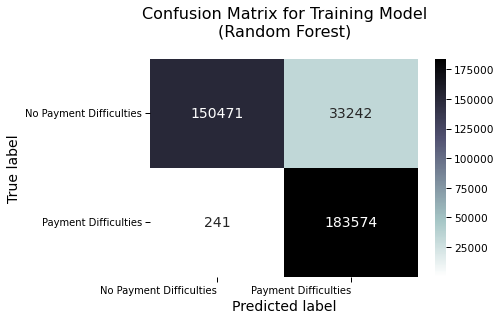

In [135]:
# form confusion matrix as a dataFrame
from sklearn.metrics import confusion_matrix, classification_report 

confusion_matrix_train_knn = pd.DataFrame((confusion_matrix(y_train, y_train_pred_knn)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
sns.set_context('paper', font_scale=1.2)
plt.figure()
heatmap = sns.heatmap(confusion_matrix_train_knn, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)

plt.title('Confusion Matrix for Training Model\n(Random Forest)\n', fontsize=16, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

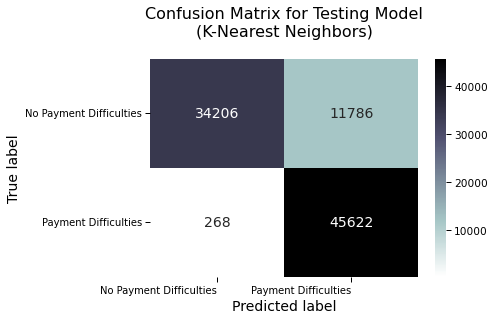

In [136]:
# form confusion matrix as a dataFrame
from sklearn.metrics import confusion_matrix, classification_report 

confusion_matrix_test_knn = pd.DataFrame((confusion_matrix(y_test, y_test_pred_knn)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
sns.set_context('paper', font_scale=1.2)
plt.figure()
heatmap = sns.heatmap(confusion_matrix_test_knn, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)

plt.title('Confusion Matrix for Testing Model\n(K-Nearest Neighbors)\n', fontsize=16, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [137]:
acc_knn_train=round(knn.score(X_train,y_train)*100,4)
acc_knn_test=round(knn.score(X_test,y_test)*100,4)
print("Training Accuracy: % {}".format(acc_knn_train))
print("Test Accuracy: % {}".format(acc_knn_test))

Training Accuracy: % 90.8897
Test Accuracy: % 86.881


##### With Feature Selection

In [138]:
#KNN
knn1 = KNeighborsClassifier().fit(X_train1,y_train1)

In [139]:
# predict data train
y_train_pred_knn1 = knn1.predict(X_train1)

# predict data test
y_test_pred_knn1 = knn1.predict(X_test1)

# print classification report (Train)
print('Classification Report Training Model (K-Nearest Neighbors):')
print(classification_report(y_train1, y_train_pred_knn1))

# print classification report (Train)
print('Classification Report Testing Model (K-Nearest Neighbors):')
print(classification_report(y_test1, y_test_pred_knn1))

Classification Report Training Model (K-Nearest Neighbors):
              precision    recall  f1-score   support

           0       1.00      0.82      0.90    183713
           1       0.85      1.00      0.92    183815

    accuracy                           0.91    367528
   macro avg       0.92      0.91      0.91    367528
weighted avg       0.92      0.91      0.91    367528

Classification Report Testing Model (K-Nearest Neighbors):
              precision    recall  f1-score   support

           0       0.99      0.75      0.86     45992
           1       0.80      0.99      0.89     45890

    accuracy                           0.87     91882
   macro avg       0.90      0.87      0.87     91882
weighted avg       0.90      0.87      0.87     91882



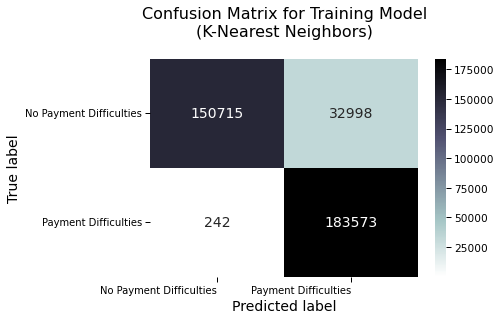

In [140]:
# form confusion matrix as a dataFrame
from sklearn.metrics import confusion_matrix, classification_report 

confusion_matrix_train_knn1 = pd.DataFrame((confusion_matrix(y_train1, y_train_pred_knn1)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
sns.set_context('paper', font_scale=1.2)
plt.figure()
heatmap = sns.heatmap(confusion_matrix_train_knn1, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)

plt.title('Confusion Matrix for Training Model\n(K-Nearest Neighbors)\n', fontsize=16, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

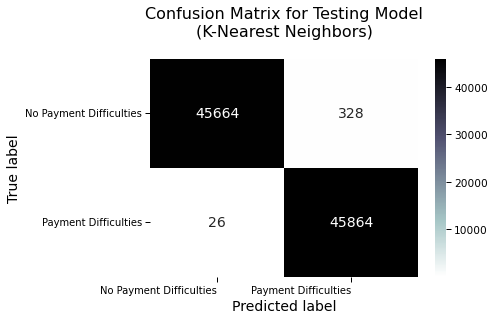

In [141]:
# form confusion matrix as a dataFrame
from sklearn.metrics import confusion_matrix, classification_report 

confusion_matrix_test_knn1 = pd.DataFrame((confusion_matrix(y_test1, y_test_pred_rf1)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
sns.set_context('paper', font_scale=1.2)
plt.figure()
heatmap = sns.heatmap(confusion_matrix_test_knn1, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)

plt.title('Confusion Matrix for Testing Model\n(K-Nearest Neighbors)\n', fontsize=16, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [142]:
acc_knn1_train1=round(knn1.score(X_train1,y_train1)*100,4)
acc_knn1_test1=round(knn1.score(X_test1,y_test1)*100,4)
print("Training Accuracy: % {}".format(acc_knn1_train1))
print("Test Accuracy: % {}".format(acc_knn1_test1))

Training Accuracy: % 90.9558
Test Accuracy: % 87.2489


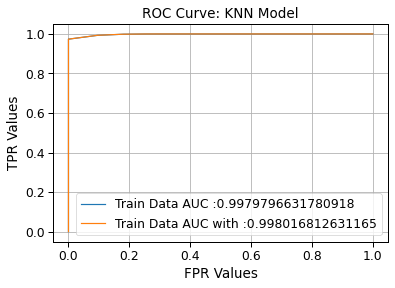

In [185]:
train_fpr_knn, test_tpr_knn, tr_thresholds_knn = roc_curve(y_train,knn.predict_proba(X_train)[:,1])
train_fpr_knn1, test_tpr_knn1, tr_thresholds_knn1 = roc_curve(y_train1,knn1.predict_proba(X_train1)[:,1])

sns.set_context('paper', font_scale=1.4)

plt.plot(train_fpr_knn,train_tpr_knn, label ="Train Data AUC :" + str(auc(train_fpr_knn,train_tpr_knn)))
plt.plot(train_fpr_knn1,train_tpr_knn1, label ="Train Data AUC with :" + str(auc(train_fpr_knn1,train_tpr_knn1)))
plt.legend()

plt.xlabel("FPR Values")
plt.ylabel("TPR Values")
plt.title('ROC Curve: KNN Model')

plt.grid(True)
plt.show()

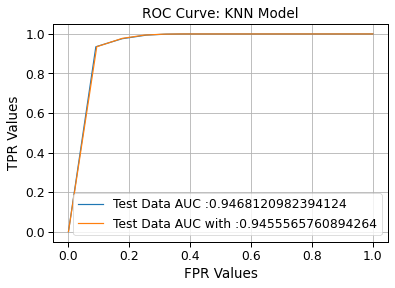

In [162]:
test_fpr_knn, test_tpr_knn, tr_thresholds_knn = roc_curve(y_test,knn.predict_proba(X_test)[:,1])
test_fpr_knn1, test_tpr_knn1, tr_thresholds_knn1 = roc_curve(y_test1,knn1.predict_proba(X_test1)[:,1])

sns.set_context('paper', font_scale=1.4)

plt.plot(test_fpr_knn,test_tpr_knn, label ="Test Data AUC :" + str(auc(test_fpr_knn,test_tpr_knn)))
plt.plot(test_fpr_knn1,test_tpr_knn1, label ="Test Data AUC with :" + str(auc(test_fpr_knn1,test_tpr_knn1)))
plt.legend()

plt.xlabel("FPR Values")
plt.ylabel("TPR Values")
plt.title('ROC Curve: KNN Model')

plt.grid(True)
plt.show()

##### Summary

In [143]:
print("Training Accuracy(without): % {}".format(acc_knn_train))
print("Test Accuracy(without): % {}".format(acc_knn_test))

print("Training Accuracy(with): % {}".format(acc_knn1_train1))
print("Test Accuracy(with): % {}".format(acc_knn1_test1))

Training Accuracy(without): % 90.8897
Test Accuracy(without): % 86.881
Training Accuracy(with): % 90.9558
Test Accuracy(with): % 87.2489


#### 5. Neural Network (Multi-layer Perceptron)

##### Without Feature Selection

In [144]:
#Neural Network (MLP)
nn = MLPClassifier(activation='tanh', solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(71, 2), random_state=1)
nn.fit(X_train, y_train)

MLPClassifier(activation='tanh', alpha=1e-05, hidden_layer_sizes=(71, 2),
              random_state=1, solver='lbfgs')

In [145]:
# predict data train
y_train_pred_nn = nn.predict(X_train)

# predict data test
y_test_pred_nn = nn.predict(X_test)

# print classification report (Train)
print('Classification Report Training Model (Neural Network (MLP)):')
print(classification_report(y_train, y_train_pred_nn))

# print classification report (Test)
print('Classification Report Testing Model (Neural Network (MLP)):')
print(classification_report(y_test, y_test_pred_nn))

Classification Report Training Model (Neural Network (MLP)):
              precision    recall  f1-score   support

           0       0.76      0.67      0.71    183713
           1       0.71      0.78      0.74    183815

    accuracy                           0.73    367528
   macro avg       0.73      0.73      0.73    367528
weighted avg       0.73      0.73      0.73    367528

Classification Report Testing Model (Neural Network (MLP)):
              precision    recall  f1-score   support

           0       0.75      0.66      0.70     45992
           1       0.69      0.77      0.73     45890

    accuracy                           0.72     91882
   macro avg       0.72      0.72      0.72     91882
weighted avg       0.72      0.72      0.72     91882



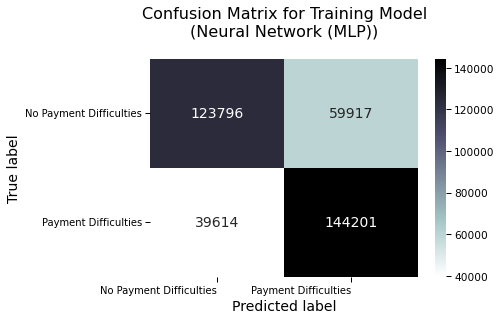

In [146]:
# form confusion matrix as a dataFrame
from sklearn.metrics import confusion_matrix, classification_report 

confusion_matrix_train_nn = pd.DataFrame((confusion_matrix(y_train, y_train_pred_nn)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
sns.set_context('paper', font_scale=1.2)
plt.figure()
heatmap = sns.heatmap(confusion_matrix_train_nn, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)

plt.title('Confusion Matrix for Training Model\n(Neural Network (MLP))\n', fontsize=16, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

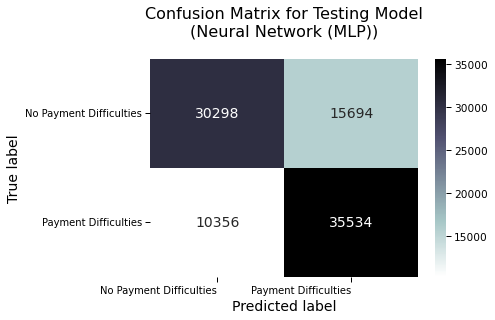

In [147]:
# form confusion matrix as a dataFrame
from sklearn.metrics import confusion_matrix, classification_report 

confusion_matrix_test_nn = pd.DataFrame((confusion_matrix(y_test, y_test_pred_nn)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
sns.set_context('paper', font_scale=1.2)
plt.figure()
heatmap = sns.heatmap(confusion_matrix_test_nn, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)

plt.title('Confusion Matrix for Testing Model\n(Neural Network (MLP))\n', fontsize=16, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [148]:
acc_nn_train=round(nn.score(X_train,y_train)*100,4)
acc_nn_test=round(nn.score(X_test,y_test)*100,4)
print("Training Accuracy: % {}".format(acc_nn_train))
print("Test Accuracy: % {}".format(acc_nn_test))

Training Accuracy: % 72.9188
Test Accuracy: % 71.6484


##### With Feature Selection

In [149]:
#Neural Network (MLP)
nn1 = MLPClassifier(activation='tanh', solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(71, 2), random_state=1)
nn1.fit(X_train1, y_train1)

MLPClassifier(activation='tanh', alpha=1e-05, hidden_layer_sizes=(71, 2),
              random_state=1, solver='lbfgs')

In [150]:
# predict data train
y_train_pred_nn1 = nn1.predict(X_train1)

# predict data test
y_test_pred_nn1 = nn1.predict(X_test1)

# print classification report (Train)
print('Classification Report Training Model (Neural Network (MLP)):')
print(classification_report(y_train1, y_train_pred_nn1))

# print classification report (Test)
print('Classification Report Testing Model (Neural Network (MLP)):')
print(classification_report(y_test1, y_test_pred_nn1))

Classification Report Training Model (Neural Network (MLP)):
              precision    recall  f1-score   support

           0       0.69      0.69      0.69    183713
           1       0.69      0.69      0.69    183815

    accuracy                           0.69    367528
   macro avg       0.69      0.69      0.69    367528
weighted avg       0.69      0.69      0.69    367528

Classification Report Testing Model (Neural Network (MLP)):
              precision    recall  f1-score   support

           0       0.69      0.68      0.69     45992
           1       0.69      0.69      0.69     45890

    accuracy                           0.69     91882
   macro avg       0.69      0.69      0.69     91882
weighted avg       0.69      0.69      0.69     91882



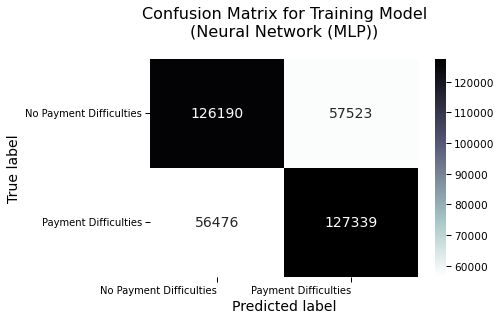

In [151]:
# form confusion matrix as a dataFrame
from sklearn.metrics import confusion_matrix, classification_report 

confusion_matrix_train_nn1 = pd.DataFrame((confusion_matrix(y_train1, y_train_pred_nn1)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
sns.set_context('paper', font_scale=1.2)
plt.figure()
heatmap = sns.heatmap(confusion_matrix_train_nn1, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)

plt.title('Confusion Matrix for Training Model\n(Neural Network (MLP))\n', fontsize=16, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

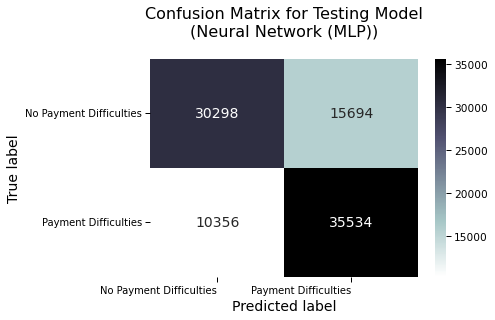

In [152]:
# form confusion matrix as a dataFrame
from sklearn.metrics import confusion_matrix, classification_report 

confusion_matrix_test_nn1 = pd.DataFrame((confusion_matrix(y_test1, y_test_pred_nn1)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
sns.set_context('paper', font_scale=1.2)
plt.figure()
heatmap = sns.heatmap(confusion_matrix_test_nn, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)

plt.title('Confusion Matrix for Testing Model\n(Neural Network (MLP))\n', fontsize=16, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [153]:
acc_nn1_train=round(nn1.score(X_train1,y_train1)*100,4)
acc_nn1_test=round(nn1.score(X_test1,y_test1)*100,4)
print("Training Accuracy: % {}".format(acc_nn1_train))
print("Test Accuracy: % {}".format(acc_nn1_test))

Training Accuracy: % 68.9822
Test Accuracy: % 68.9319


##### Summary

In [154]:
print("Training Accuracy(without): % {}".format(acc_nn_train))
print("Test Accuracy(without): % {}".format(acc_nn_test))

print("Training Accuracy(with): % {}".format(acc_nn1_train))
print("Test Accuracy(with): % {}".format(acc_nn1_test))

Training Accuracy(without): % 72.9188
Test Accuracy(without): % 71.6484
Training Accuracy(with): % 68.9822
Test Accuracy(with): % 68.9319


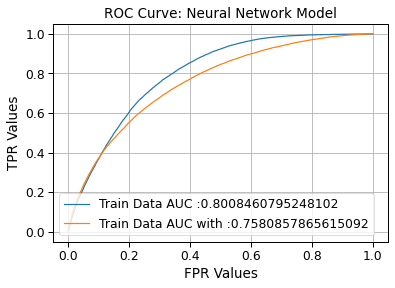

In [187]:
train_fpr_nn, train_tpr_nn, tr_thresholds_nn = roc_curve(y_train,nn.predict_proba(X_train)[:,1])
train_fpr_nn1, train_tpr_nn1, tr_thresholds_nn1 = roc_curve(y_train,nn1.predict_proba(X_train1)[:,1])

sns.set_context('paper', font_scale=1.4)

plt.plot(train_fpr_nn,train_tpr_nn, label ="Train Data AUC :" + str(auc(train_fpr_nn,train_tpr_nn)))
plt.plot(train_fpr_nn1,train_tpr_nn1, label ="Train Data AUC with :" + str(auc(train_fpr_nn1,train_tpr_nn1)))
plt.legend()

plt.xlabel("FPR Values")
plt.ylabel("TPR Values")
plt.title('ROC Curve: Neural Network Model')

plt.grid(True)
plt.show()

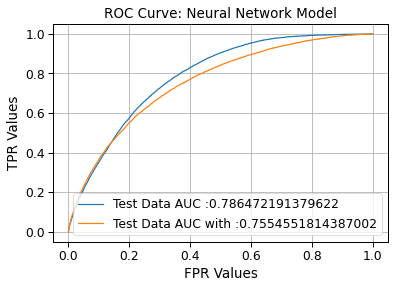

In [161]:
test_fpr_nn, test_tpr_nn, tr_thresholds_nn = roc_curve(y_test,nn.predict_proba(X_test)[:,1])
test_fpr_nn1, test_tpr_nn1, tr_thresholds_nn1 = roc_curve(y_test1,nn1.predict_proba(X_test1)[:,1])

sns.set_context('paper', font_scale=1.4)

plt.plot(test_fpr_nn,test_tpr_nn, label ="Test Data AUC :" + str(auc(test_fpr_nn,test_tpr_nn)))
plt.plot(test_fpr_nn1,test_tpr_nn1, label ="Test Data AUC with :" + str(auc(test_fpr_nn1,test_tpr_nn1)))
plt.legend()

plt.xlabel("FPR Values")
plt.ylabel("TPR Values")
plt.title('ROC Curve: Neural Network Model')

plt.grid(True)
plt.show()